In [3]:
if (!require(ggplot2)) install.packages('ggplot2')
if (!require(plotly)) install.packages('plotly')
if (!require(dplyr)) install.packages('dplyr')
if (!require(tidyr)) install.packages('tidyr')
if (!require(viridis)) install.packages('viridis')
if (!require(corrplot)) install.packages('corrplot')
if (!require(car)) install.packages('car')
if (!require(caTools)) install.packages("caTools")
if (!require(tidymodels))install.packages("tidymodels")
if (!require(glmnet))install.packages("glmnet")
if (!require(tibble))install.packages("tibble")
if (!require(ggpubr))install.packages("ggpubr")
if (!require(caret))install.packages("caret")
if (!require(kableExtra))install.packages("kableExtra")
if (!require(keras))install.packages("keras")
library(ggpubr)
library(caTools)
library(ggplot2)
library(plotly)
library(dplyr)
library(tidyr)
library(viridis)
library(corrplot)
library(car)
library(tidymodels)
library(glmnet)
library(tibble)
library(caret)
library(kableExtra)
library(keras)

Loading required package: plotly

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘plotly’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’


Loading required package: viridis

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘viridis’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: corrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘corrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: car

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical

In [ ]:
library(dplyr)
library(readr)
library(readxl)

college_data <- read_csv('College_Data.csv')
data_table_1 <- read_csv('Data-Table 1.csv')
he_seg_data <- read_csv('HEsegDataviz_CollegeData_4-year_v5.csv')
ipeds_data <- read_excel('IPEDS_data 2.xlsx')
college_data <- rename(college_data, UniversityName = `...1`)
data_table_1 <- rename(data_table_1, UniversityName = Name)
he_seg_data <- rename(he_seg_data, UniversityName = inst_name)
ipeds_data <- rename(ipeds_data, UniversityName = Name)
common_universities <- Reduce(intersect, list(college_data$UniversityName, data_table_1$UniversityName, he_seg_data$UniversityName, ipeds_data$UniversityName))
college_data_filtered <- filter(college_data, UniversityName %in% common_universities)
data_table_1_filtered <- filter(data_table_1, UniversityName %in% common_universities)
he_seg_data_filtered <- filter(he_seg_data, UniversityName %in% common_universities)
ipeds_data_filtered <- filter(ipeds_data, UniversityName %in% common_universities)
college_data_agg <- college_data_filtered %>% group_by(UniversityName) %>% summarize(across(everything(), mean, na.rm = TRUE))
data_table_1_agg <- data_table_1_filtered %>% group_by(UniversityName) %>% summarize(across(everything(), mean, na.rm = TRUE))
he_seg_data_agg <- he_seg_data_filtered %>% group_by(UniversityName) %>% summarize(across(everything(), mean, na.rm = TRUE))
ipeds_data_agg <- ipeds_data_filtered %>% group_by(UniversityName) %>% summarize(across(everything(), mean, na.rm = TRUE))
custom_merge <- function(df1, df2) {
  combined <- full_join(df1, df2, by = "UniversityName")
  common_cols <- intersect(names(df1), names(df2))
  common_cols <- common_cols[common_cols != "UniversityName"]

  for (col in common_cols) {
    combined[[col]] <- ifelse(!is.na(combined[[paste0(col, ".x")]]), combined[[paste0(col, ".x")]], combined[[paste0(col, ".y")]])
    combined <- combined %>% select(-paste0(col, ".x"), -paste0(col, ".y"))
  }

  return(combined)
}
combined_data_1 <- custom_merge(college_data_agg, data_table_1_agg)
combined_data_2 <- custom_merge(combined_data_1, he_seg_data_agg)
combined_data_final <- custom_merge(combined_data_2, ipeds_data_agg)
col_threshold <- nrow(combined_data_final) * 0.5
cols_to_delete <- which(colSums(is.na(combined_data_final)) >= col_threshold)
deleted_columns <- names(combined_data_final)[cols_to_delete]
combined_data_final <- combined_data_final %>% select(-one_of(deleted_columns))
deleted_columns
row_threshold <- ncol(combined_data_final) * 0.5
combined_data_clean_threshold <- combined_data_final %>% filter(rowSums(is.na(.)) <= row_threshold)
num_rows_cleaned_threshold <- nrow(combined_data_clean_threshold)
head(combined_data_clean_threshold)
num_rows_cleaned_threshold


Attaching package: ‘readr’


The following object is masked from ‘package:yardstick’:

    spec


The following object is masked from ‘package:scales’:

    col_factor


New names:
• `` -> `...1`
Rows: 777 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ...1, Private
dbl (17): Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1534 Columns: 108
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): Name, State abbreviation, FIPS state code, Geographic region, Sect...
dbl (97): Applicants total, Admissions total, Enrolled total, Percent of fre...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this 

[1] "Private"                                              
 [2] "fips_ipeds"                                           
 [3] "slevel"                                               
 [4] "fourcat"                                              
 [5] "ZIP code"                                             
 [6] "Highest degree offered"                               
 [7] "County name"                                          
 [8] "Religious affiliation"                                
 [9] "Offers Less than one year certificate"                
[10] "Offers One but less than two years certificate"       
[11] "Offers Associate's degree"                            
[12] "Offers Two but less than 4 years certificate"         
[13] "Offers Bachelor's degree"                             
[14] "Offers Postbaccalaureate certificate"                 
[15] "Offers Master's degree"                               
[16] "Offers Post-master's certificate"                     
[17] "Offers Doctor's degree - research/scholarship"        
[18] "Offers Doctor's degree - professional practice"       
[19] "Offers Doctor's degree - other"                       
[20] "Offers Other degree"                                  
[21] "State abbreviation"                                   
[22] "FIPS state code"                                      
[23] "Geographic region"                                    
[24] "Sector of institution"                                
[25] "Level of institution"                                 
[26] "Control of institution"                               
[27] "Historically Black College or University"             
[28] "Tribal college"                                       
[29] "Degree of urbanization (Urban-centric locale)"        
[30] "Carnegie Classification 2010: Basic"                  
[31] "Endowment assets (year end) per FTE enrollment (GASB)"

UniversityName,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,⋯,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (FASB),year
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,⋯,24,23,7,20,99,58,57,17,82162,2013
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,⋯,32,32,10,39,94,58,58,15,20248,2013
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,⋯,50,50,47,57,97,85,85,10,16118,2013
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,⋯,54,54,4,51,100,76,76,17,281391,2013
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,⋯,42,42,15,15,100,58,58,4,192792,2013
Albertus Magnus College,353,340,103,17,45,416,230,13290,5720,⋯,43,43,27,54,83,78,78,19,2997,2013


[1] 488

In [ ]:
selected_columns_with_accept <- c(
  "UniversityName", "Apps", "Accept", "Top10perc", "Top25perc", "F.Undergrad",
  "P.Undergrad", "Outstate", "Room.Board", "Books", "Personal", "PhD",
  "Terminal", "S.F.Ratio", "perc.alumni", "Expend", "Grad.Rate", "public",
  "private", "forprofit", "selective", "more_selective", "non_selective",
  "total_enrollment", "col_white", "mkt_white", "dif_white", "col_hispa",
  "mkt_hispa", "dif_hispa", "col_black", "mkt_black", "dif_black", "col_asian",
  "mkt_asian", "dif_asian", "col_amind", "mkt_amind", "dif_amind", "col_pacis",
  "mkt_pacis", "dif_pacis", "col_twora", "mkt_twora", "dif_twora",
  "Longitude location of institution", "Latitude location of institution",
  "Bachelor's degrees awarded", "Master's degrees awarded",
  "Doctor's degrese - research/scholarship awarded",
  "Doctor's degrees - professional practice awarded",
  "SAT Math 75th percentile score", "ACT Composite 75th percentile score",
  "Tuition and fees, 2013-14", "Total price for in-state students living on campus 2013-14",
  "Total price for out-of-state students living on campus 2013-14",
  "Graduation rate - Bachelor degree within 4 years, total",
  "Graduation rate - Bachelor degree within 6 years, total",
  "Percent of freshmen receiving any financial aid", "Percent of freshmen receiving Pell grants",
  "Endowment assets (year end) per FTE enrollment (FASB)"
)

selected_data_with_accept <- combined_data_final %>% select(all_of(selected_columns_with_accept))

selected_data <- selected_data_with_accept %>%
  mutate(AcceptanceRate = Accept / Apps) %>%
  select(-Accept)

head(selected_data)

ERROR: Error in eval(expr, envir, enclos): object 'combined_data_final' not found


In [ ]:
selected_data <- selected_data %>% select(-`Doctor's degrees - professional practice awarded`)

In [ ]:
selected_data <- selected_data %>% select(-forprofit)

In [ ]:
cols_with_na <- c("SAT Math 75th percentile score", "ACT Composite 75th percentile score", "Endowment assets (year end) per FTE enrollment (FASB)")

dataset_A <- selected_data %>% filter(complete.cases(select(., all_of(cols_with_na))))
dataset_B <- selected_data %>% filter(!complete.cases(select(., all_of(cols_with_na))))

write.csv(dataset_A, "dataset_A.csv", row.names = FALSE)
write.csv(dataset_B, "dataset_B.csv", row.names = FALSE)

cat("Datasets saved as 'dataset_A.csv' and 'dataset_B.csv'\n")


ERROR: Error in selected_data %>% filter(complete.cases(select(., all_of(cols_with_na)))): could not find function "%>%"


In [1]:
library(tidyverse)

selected_data <- read_csv('/content/combined_dataset.csv')

head(selected_data)

missing_values_summary <- sapply(selected_data, function(x) sum(is.na(x)))
missing_values_summary <- missing_values_summary[missing_values_summary > 0]

if (length(missing_values_summary) > 0) {
  cat("Columns with missing values:\n")
  print(missing_values_summary)
} else {
  cat("No missing values in the dataset.\n")
}


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 488 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): UniversityName
dbl (58): Apps, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


UniversityName,Apps,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,⋯,ACT Composite 75th percentile score,"Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 6 years, total",Percent of freshmen receiving any financial aid,Percent of freshmen receiving Pell grants,Endowment assets (year end) per FTE enrollment (FASB),AcceptanceRate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,0.075341782,0.2150538,0.4074074,0.181830490,0.052446184,0.1951173,0.1616267,0.11428571,0.29770992,⋯,0.5789474,0.4538543,0.4425694,0.4425694,0.4111111,0.5060241,0.9830508,0.1818182,0.035135040,0.6950596
Adelphi University,0.101586668,0.1397849,0.1234568,0.168155971,0.119960861,0.5028292,0.7090719,0.28571429,0.19083969,⋯,0.4210526,0.5223322,0.5702197,0.5702197,0.5888889,0.5783133,0.9322034,0.2987013,0.008445256,0.8582476
Adrian College,0.063766091,0.2043011,0.3827160,0.056661251,0.009589041,0.4373450,0.2398332,0.08571429,0.13969466,⋯,0.4210526,0.5211583,0.4651666,0.4651666,0.4333333,0.4698795,0.9661017,0.5324675,0.006664902,0.7258558
Alaska Pacific University,0.002145494,0.1397849,0.3086420,0.003384782,0.084931507,0.2027465,0.3041363,0.31428571,0.19083969,⋯,0.4210526,0.4946615,0.4757440,0.4757440,0.2777778,0.3012048,1.0000000,0.4285714,0.082825236,0.7119818
Albion College,0.087266740,0.3655914,0.6049383,0.094435418,0.003033268,0.6037892,0.4268335,0.11428571,0.09160305,⋯,0.6315789,0.6690983,0.5963027,0.5963027,0.7111111,0.7108434,0.9830508,0.1948052,0.052280318,0.8885173
Albright College,0.044306955,0.2903226,0.5432099,0.052396426,0.029843444,0.7135864,0.3527981,0.02857143,0.03816794,⋯,0.4736842,0.6861200,0.6195009,0.6195009,0.5333333,0.4698795,0.9830508,0.5324675,0.010458391,0.7732564


No missing values in the dataset.


In [2]:
library(tidymodels)
library(dplyr)
library(ggplot2)

# Remove the UniversityName column and split the data
selected_data <- selected_data %>% select(-UniversityName)
formula <- as.formula("AcceptanceRate ~ .")

set.seed(123)
data_split <- initial_split(selected_data, prop = 0.8)
train_data <- training(data_split)
test_data <- testing(data_split)

# Specify the linear regression model
lm_spec <- linear_reg() %>%
  set_engine("lm") %>%
  set_mode("regression")

# Fit the model
lm_fit <- lm_spec %>%
  fit(formula, data = train_data)

# Output model summary
summary(lm_fit$fit)

# Make predictions on the test set
predictions <- predict(lm_fit, test_data)

# Combine the predictions with the test data
results <- bind_cols(test_data, predictions)

# Define the metrics
rmse_metric <- rmse(results, truth = AcceptanceRate, estimate = .pred)
rsq_metric <- rsq(results, truth = AcceptanceRate, estimate = .pred)
mae_metric <- mae(results, truth = AcceptanceRate, estimate = .pred)

# Print the metrics
print(rmse_metric)
print(rsq_metric)
print(mae_metric)

# Extract the coefficients
coefficients <- tidy(lm_fit$fit)

# Visualize the coefficients
coef_plot <- ggplot(coefficients, aes(x = reorder(term, estimate), y = estimate)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Linear Regression Coefficients",
       x = "Features",
       y = "Coefficient Value") +
  theme_minimal()

print(coef_plot)


ERROR: Error in library(tidymodels): there is no package called ‘tidymodels’


58 x 1 sparse Matrix of class "dgCMatrix"
                                                                            s1
(Intercept)                                                       0.7623610015
Apps                                                             -0.2433724960
Top10perc                                                        -0.1924969340
Top25perc                                                         .           
F.Undergrad                                                       0.1643019172
P.Undergrad                                                      -0.0571133305
Outstate                                                          .           
Room.Board                                                        .           
Books                                                             .           
Personal                                                          .           
PhD                                                               .           
Terminal  

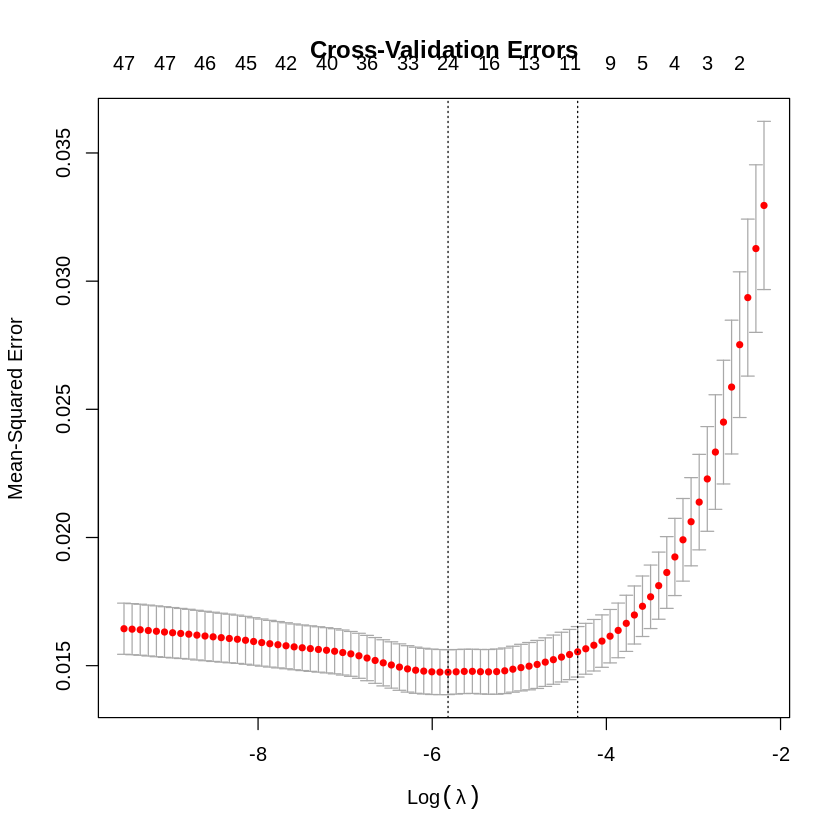

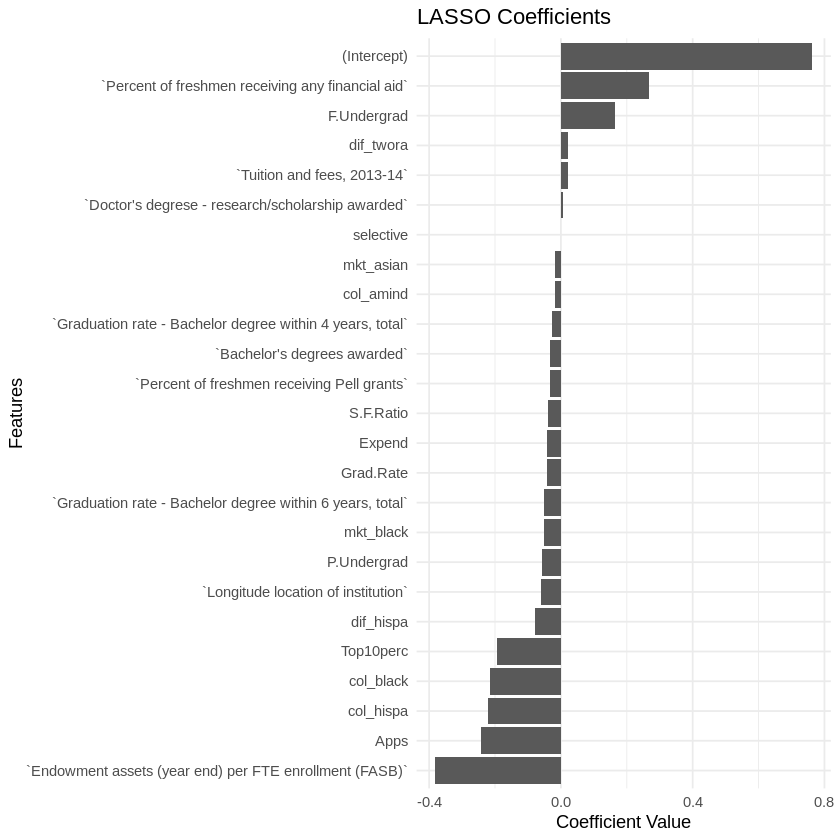

In [15]:
library(glmnet)
library(dplyr)
library(ggplot2)
library(tibble)

# Prepare the data
x <- model.matrix(AcceptanceRate ~ ., selected_data)[,-1]
y <- selected_data$AcceptanceRate
set.seed(123)
train_indices <- sample(seq_len(nrow(selected_data)), size = 0.8 * nrow(selected_data))
x_train <- x[train_indices, ]
y_train <- y[train_indices]
x_test <- x[-train_indices, ]
y_test <- y[-train_indices]

# Fit the LASSO model with cross-validation
lasso_model <- cv.glmnet(x_train, y_train, alpha = 1, nfolds = 10)

# Best lambda
best_lambda <- lasso_model$lambda.min

# Coefficients of the best model
lasso_coefficients <- coef(lasso_model, s = best_lambda)
print(lasso_coefficients)

# Predictions on the test set
lasso_predictions <- predict(lasso_model, s = best_lambda, newx = x_test)

# Performance metrics
lasso_rmse <- sqrt(mean((lasso_predictions - y_test)^2))
lasso_rsq <- cor(lasso_predictions, y_test)^2
lasso_mae <- mean(abs(lasso_predictions - y_test))

cat("LASSO RMSE:", lasso_rmse, "\n")
cat("LASSO R-squared:", lasso_rsq, "\n")
cat("LASSO MAE:", lasso_mae, "\n")

# Plot the cross-validation errors
plot(lasso_model)
title("Cross-Validation Errors")

# Plot the LASSO coefficients
coef_df <- as.data.frame(as.matrix(lasso_coefficients))
coef_df <- coef_df %>% rownames_to_column(var = "Feature")
coef_df <- coef_df %>% filter(s1 != 0)

coef_plot <- ggplot(coef_df, aes(x = reorder(Feature, s1), y = s1)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "LASSO Coefficients", x = "Features", y = "Coefficient Value") +
  theme_minimal()

print(coef_plot)


Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(modelFit, newdata):
“prediction from rank-deficient fit; attr(*, "non-esti

   Degree         RMSE R_squared          MAE
1       1 1.229099e-01 0.6209257 9.406251e-02
2       2 1.425009e-01 0.7264090 1.017384e-01
3       3 4.626295e-01 0.8060525 1.826745e-01
4       4 8.504775e+00 0.8703592 1.627552e+00
5       5 1.019197e+02 0.9203801 1.760031e+01
6       6 2.459481e+03 0.9493756 3.339832e+02
7       7 1.306661e+04 0.9770319 2.093360e+03
8       8 2.398305e+06 1.0000000 3.675030e+05
9       9 6.672549e+04 1.0000000 1.066725e+04
10     10 5.584633e+04 1.0000000 1.189103e+04


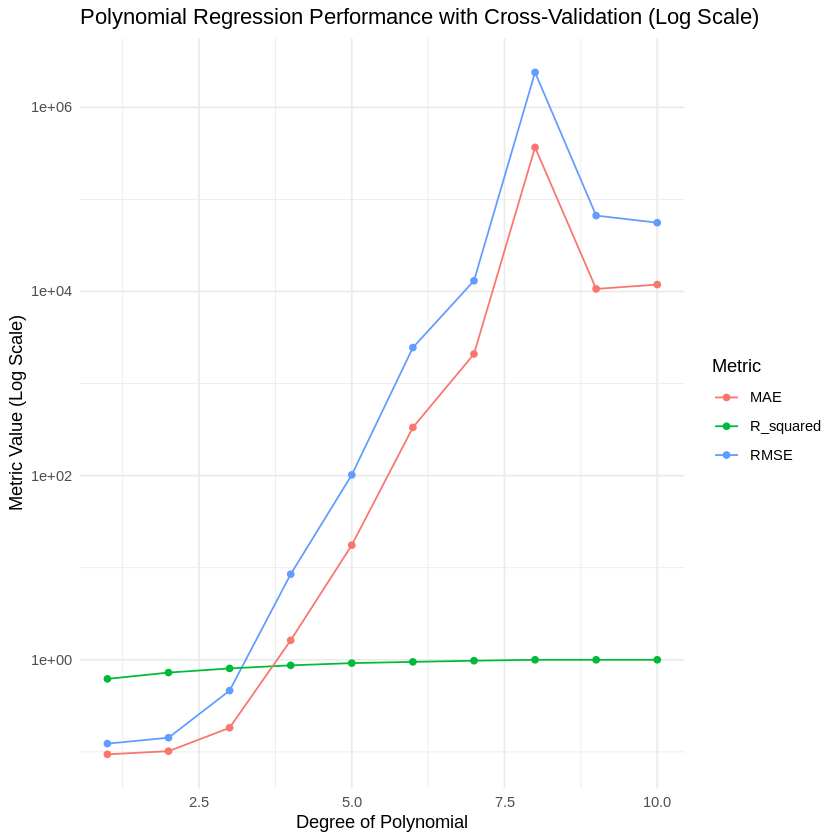

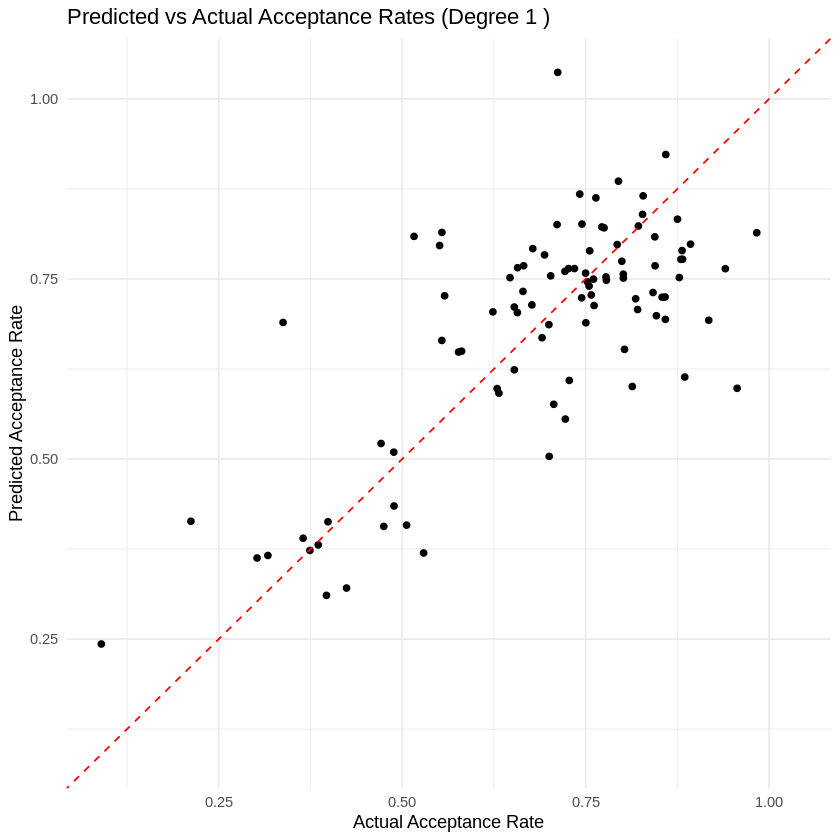

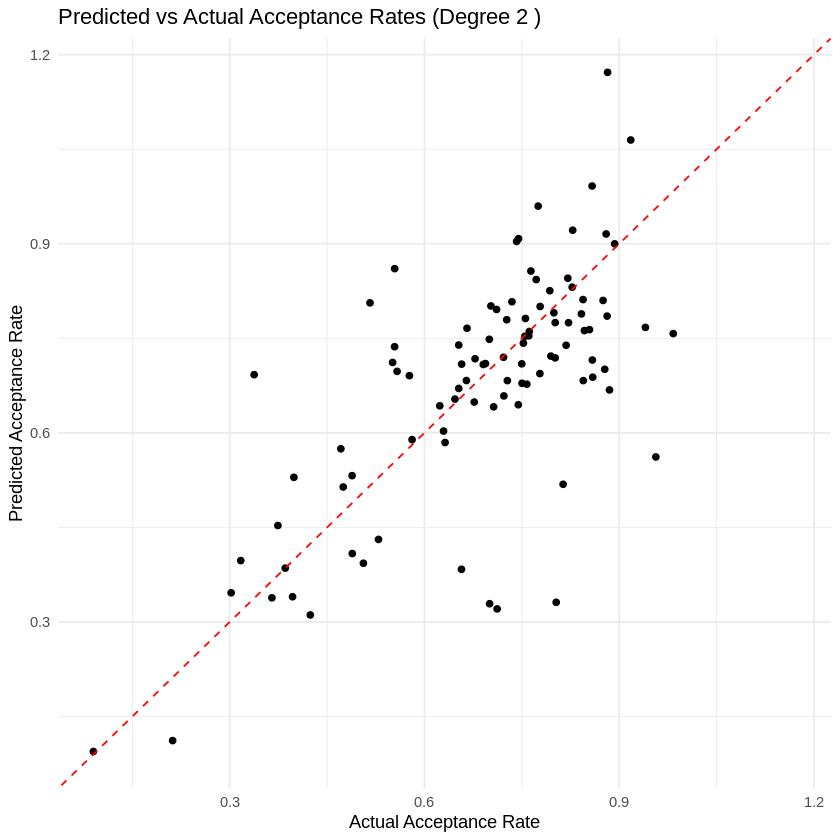

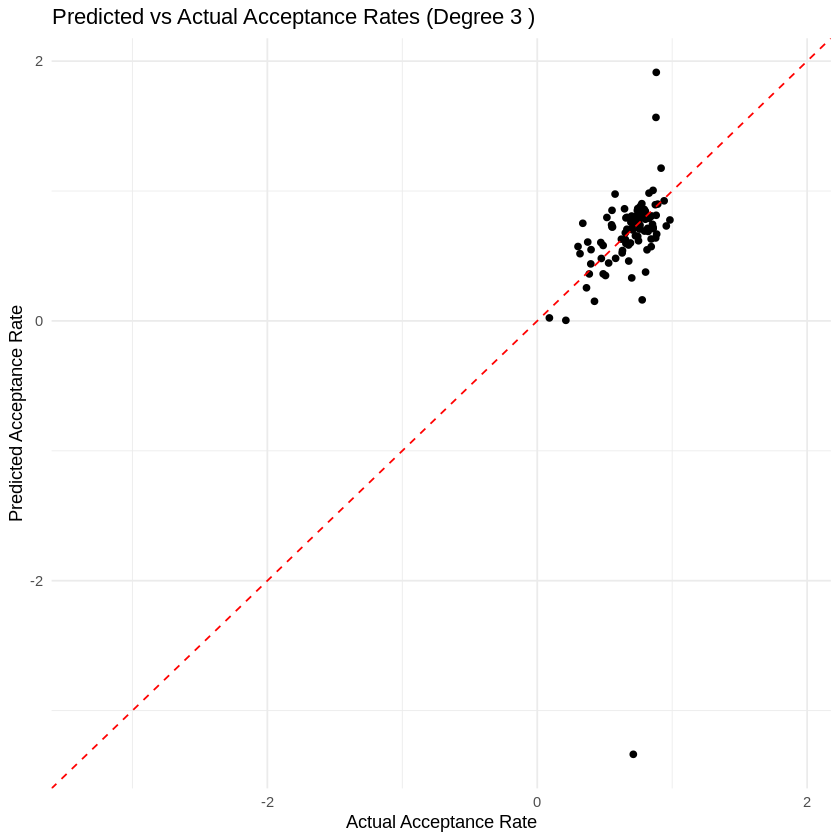

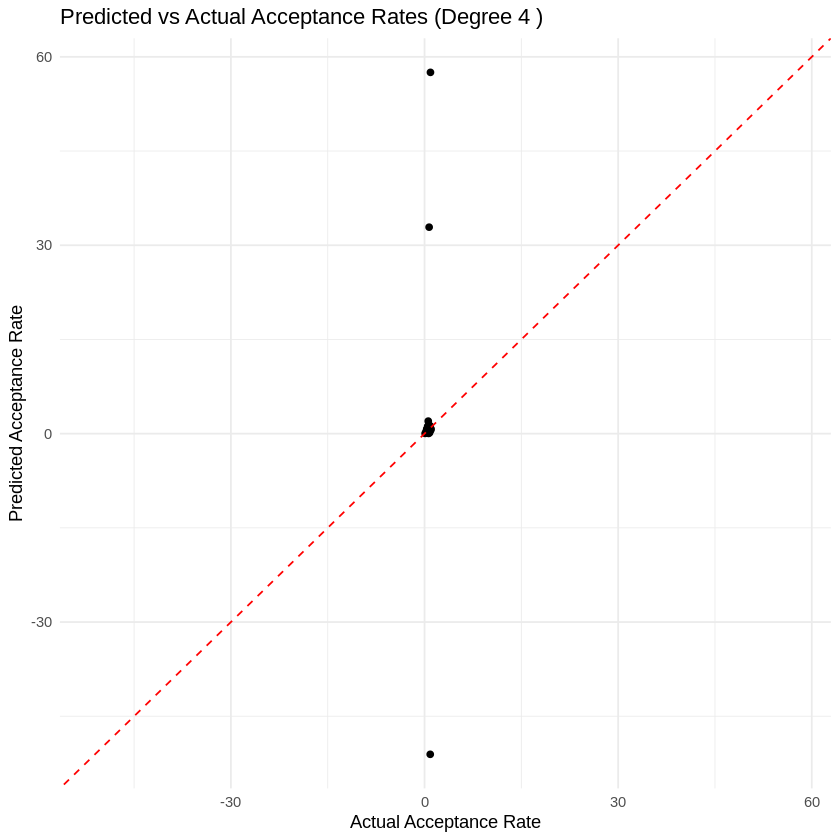

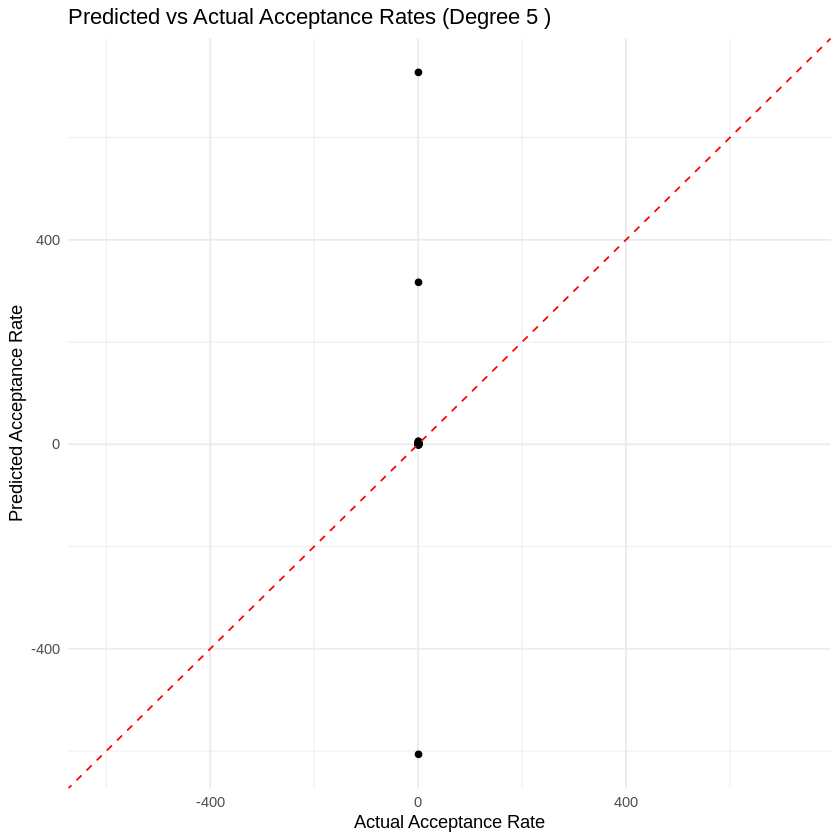

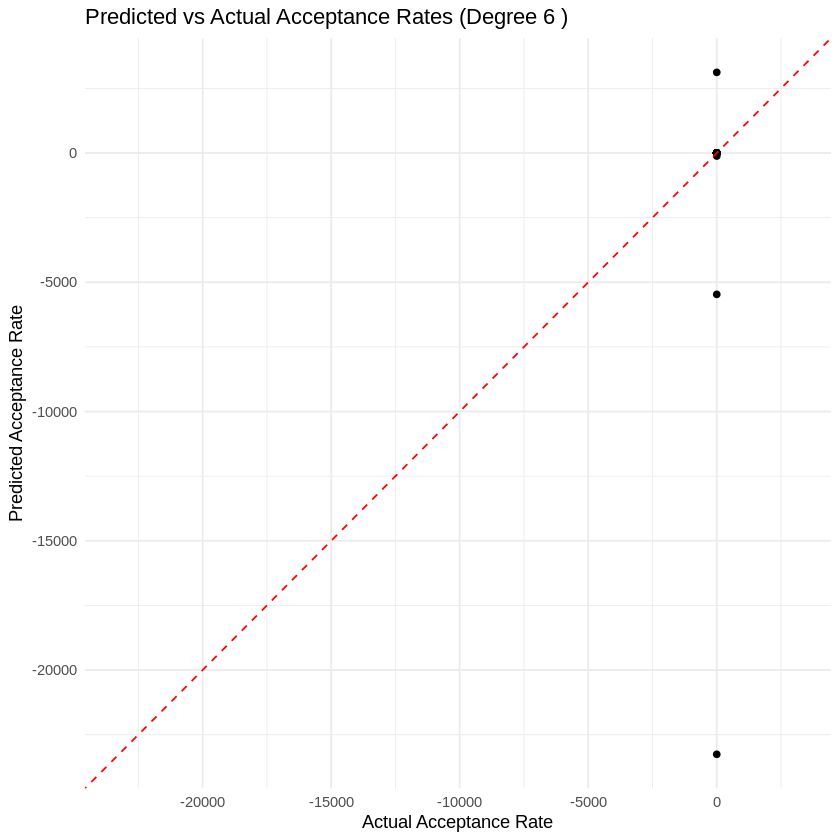

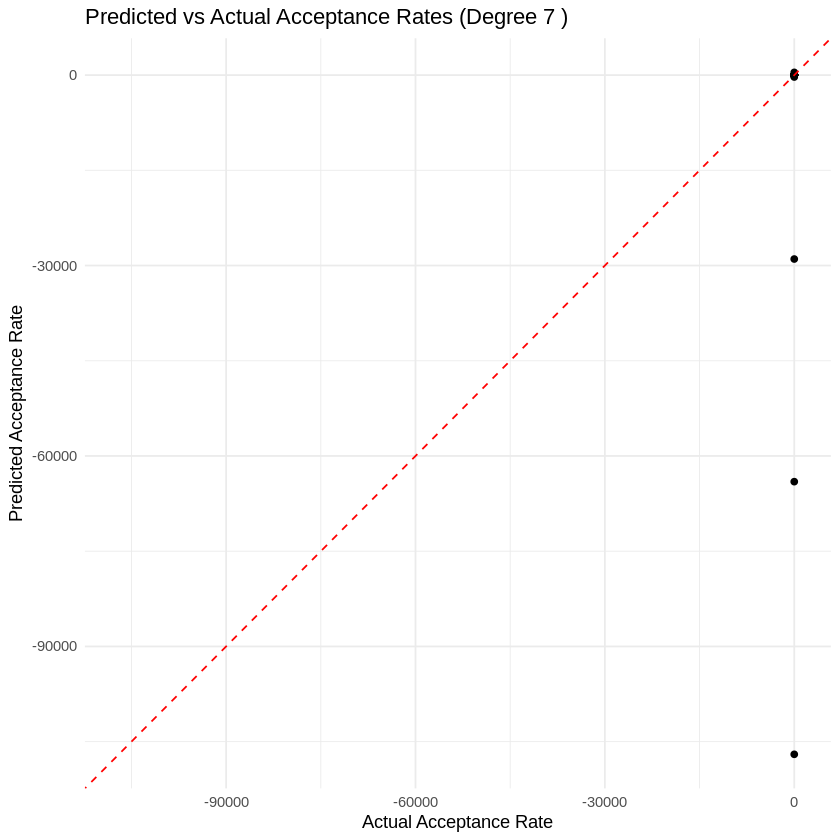

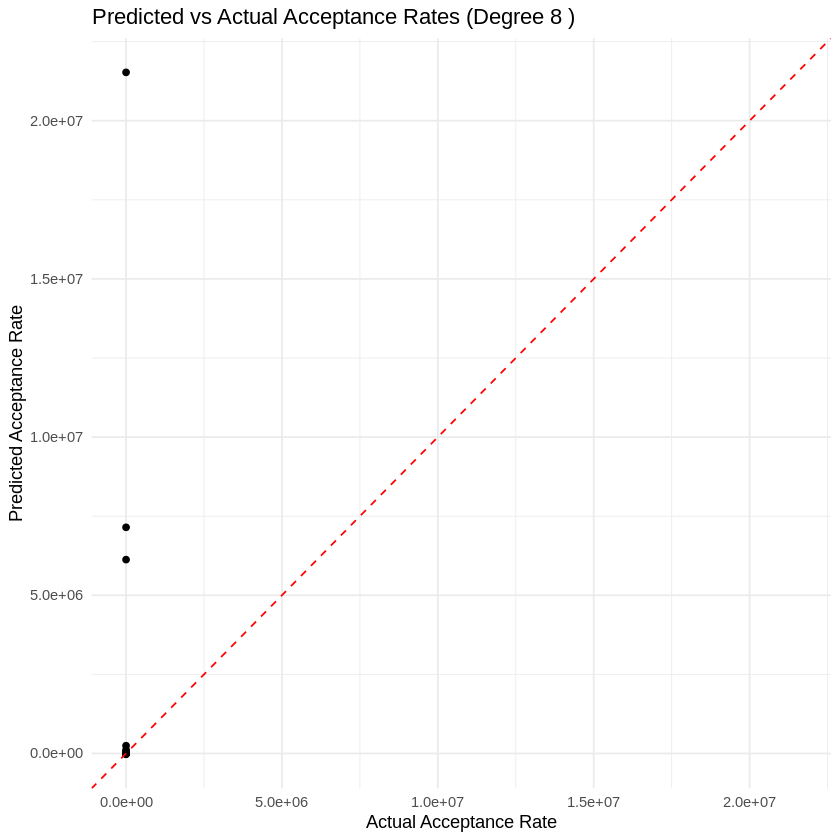

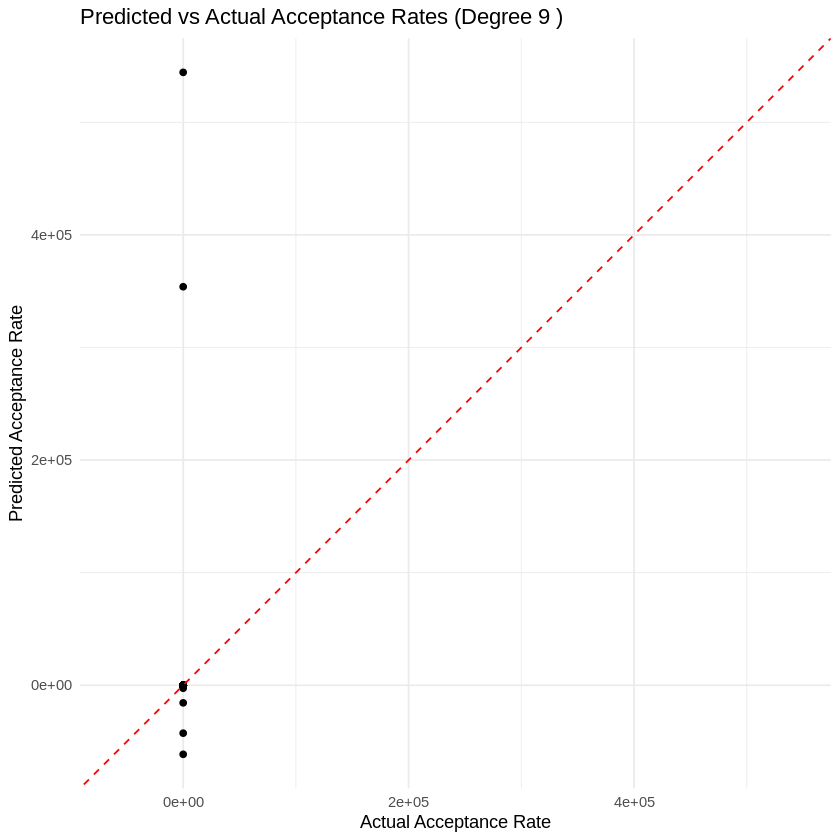

MAE for each degree on the testing data:
Degree 1 : MAE = 0.0940625091793621 
Degree 2 : MAE = 0.101738381062515 
Degree 3 : MAE = 0.18267447467166 
Degree 4 : MAE = 1.62755161993617 
Degree 5 : MAE = 17.6003093597632 
Degree 6 : MAE = 333.983189370729 
Degree 7 : MAE = 2093.35970995474 
Degree 8 : MAE = 367503.043848007 
Degree 9 : MAE = 10667.2486167903 
Degree 10 : MAE = 11891.030960912 


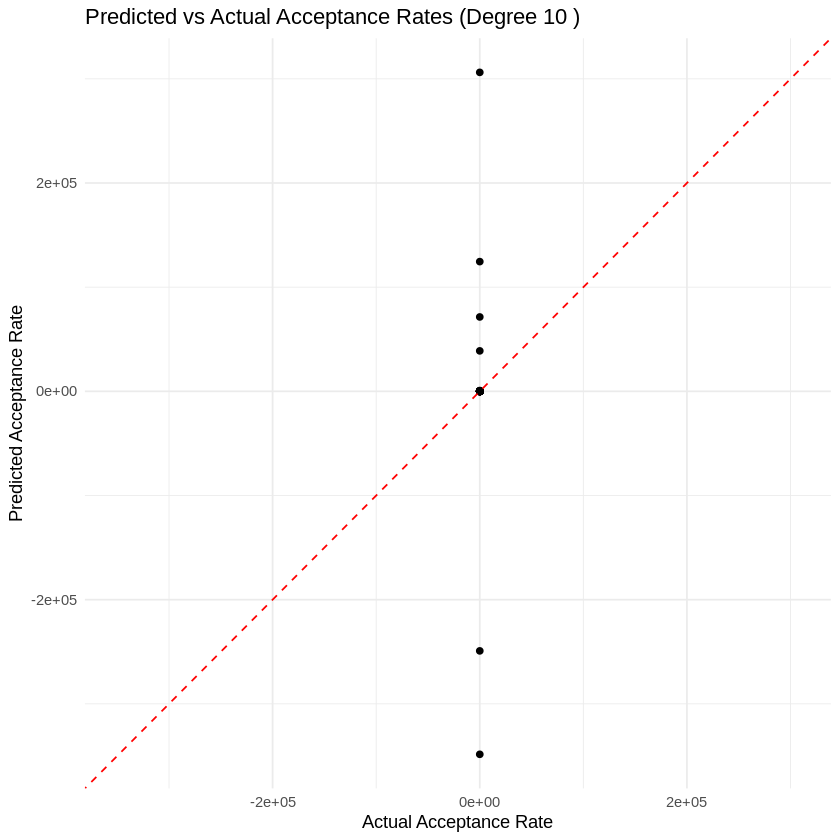

In [13]:
library(dplyr)
library(caret)
library(ggplot2)

selected_data <- selected_data %>%
  mutate(AcceptanceRate = as.numeric(AcceptanceRate))

# Split the data into training and testing sets
set.seed(123)
train_indices <- createDataPartition(selected_data$AcceptanceRate, p = 0.8, list = FALSE)
train_data <- selected_data[train_indices, ]
test_data <- selected_data[-train_indices, ]

fit_polynomial_model <- function(train_data, test_data, degree) {
  numeric_vars <- train_data %>% select(where(is.numeric))
  sufficient_unique <- numeric_vars %>% select_if(~n_distinct(.) > degree)

  poly_features <- sufficient_unique %>%
    mutate(across(everything(), ~ poly(., degree = degree, raw = TRUE)))

  remaining_vars <- train_data %>% select(-one_of(names(sufficient_unique)))
  train_data_with_poly <- cbind(remaining_vars, poly_features)

  train_data_with_poly$AcceptanceRate <- train_data$AcceptanceRate

  formula <- as.formula("AcceptanceRate ~ .")

  control <- trainControl(method = "cv", number = 10)
  model <- caret::train(formula, data = train_data_with_poly, method = "lm", trControl = control)

  test_poly_features <- test_data %>% select(names(sufficient_unique)) %>%
    mutate(across(everything(), ~ poly(., degree = degree, raw = TRUE)))

  test_data_with_poly <- cbind(test_data %>% select(-one_of(names(sufficient_unique))), test_poly_features)
  test_data_with_poly$AcceptanceRate <- test_data$AcceptanceRate

  predicted <- predict(model, newdata = test_data_with_poly)
  rmse <- sqrt(mean((test_data$AcceptanceRate - predicted)^2))
  rsq <- summary(model$finalModel)$r.squared
  mae <- mean(abs(test_data$AcceptanceRate - predicted))

  return(list(model = model, rmse = rmse, rsq = rsq, mae = mae, predicted = predicted, actual = test_data$AcceptanceRate))
}

degrees <- 1:10
models <- lapply(degrees, fit_polynomial_model, train_data = train_data, test_data = test_data)

performance_metrics <- data.frame(
  Degree = degrees,
  RMSE = sapply(models, function(x) x$rmse),
  R_squared = sapply(models, function(x) x$rsq),
  MAE = sapply(models, function(x) x$mae)
)

print(performance_metrics)

performance_plot <- ggplot(performance_metrics, aes(x = Degree)) +
  geom_line(aes(y = RMSE, color = "RMSE")) +
  geom_point(aes(y = RMSE, color = "RMSE")) +
  geom_line(aes(y = R_squared, color = "R_squared")) +
  geom_point(aes(y = R_squared, color = "R_squared")) +
  geom_line(aes(y = MAE, color = "MAE")) +
  geom_point(aes(y = MAE, color = "MAE")) +
  scale_y_log10() +
  labs(title = "Polynomial Regression Performance with Cross-Validation (Log Scale)",
       x = "Degree of Polynomial",
       y = "Metric Value (Log Scale)",
       color = "Metric") +
  theme_minimal()

print(performance_plot)

# Plot predicted vs actual for each degree
for (i in 1:length(models)) {
  model <- models[[i]]
  results <- data.frame(Predicted = model$predicted, Actual = model$actual)

  # Get the minimum and maximum values for both predicted and actual values
  min_val <- min(results$Predicted, results$Actual)
  max_val <- max(results$Predicted, results$Actual)

  plot_title <- paste('Predicted vs Actual Acceptance Rates (Degree', degrees[i], ')')

  p <- ggplot(results, aes(x = Actual, y = Predicted)) +
    geom_point() +
    geom_abline(slope = 1, intercept = 0, color = 'red', linetype = 'dashed') +
    labs(title = plot_title,
         x = 'Actual Acceptance Rate',
         y = 'Predicted Acceptance Rate') +
    xlim(min_val, max_val) +
    ylim(min_val, max_val) +
    theme_minimal()

  print(p)
}

# Print the MAE for each degree
cat("MAE for each degree on the testing data:\n")
for (i in 1:length(models)) {
  cat(paste("Degree", degrees[i], ": MAE =", models[[i]]$mae, "\n"))
}



Call:
 randomForest(x = x_train, y = y_train, ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 19

          Mean of squared residuals: 0.01523567
                    % Var explained: 53.23
Mean Squared Error: 0.01361528 
Mean Absolute Error: 0.09150913 


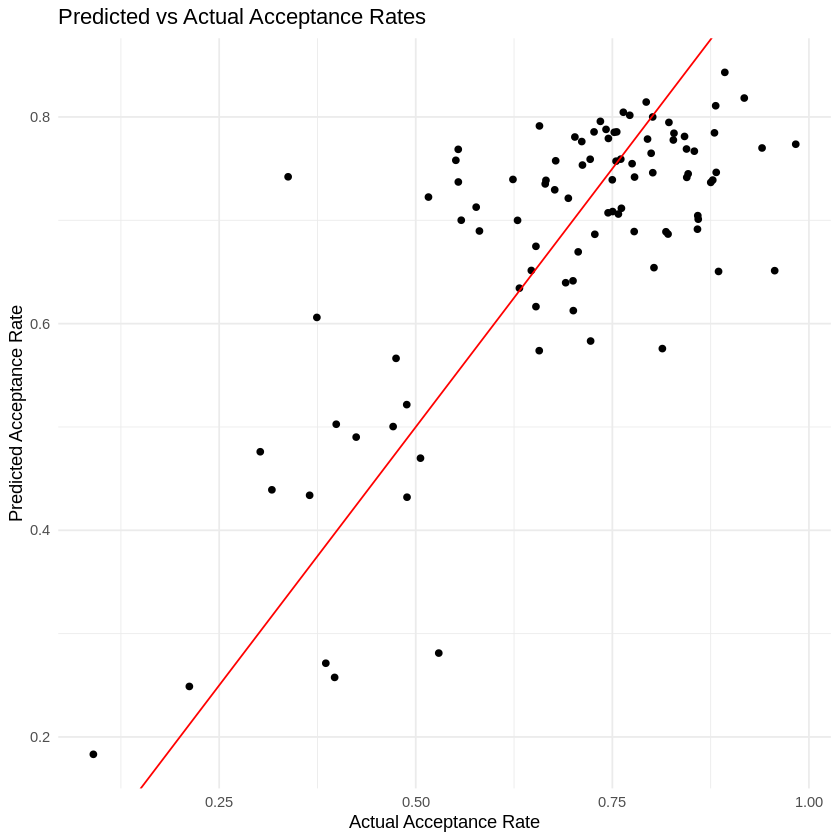

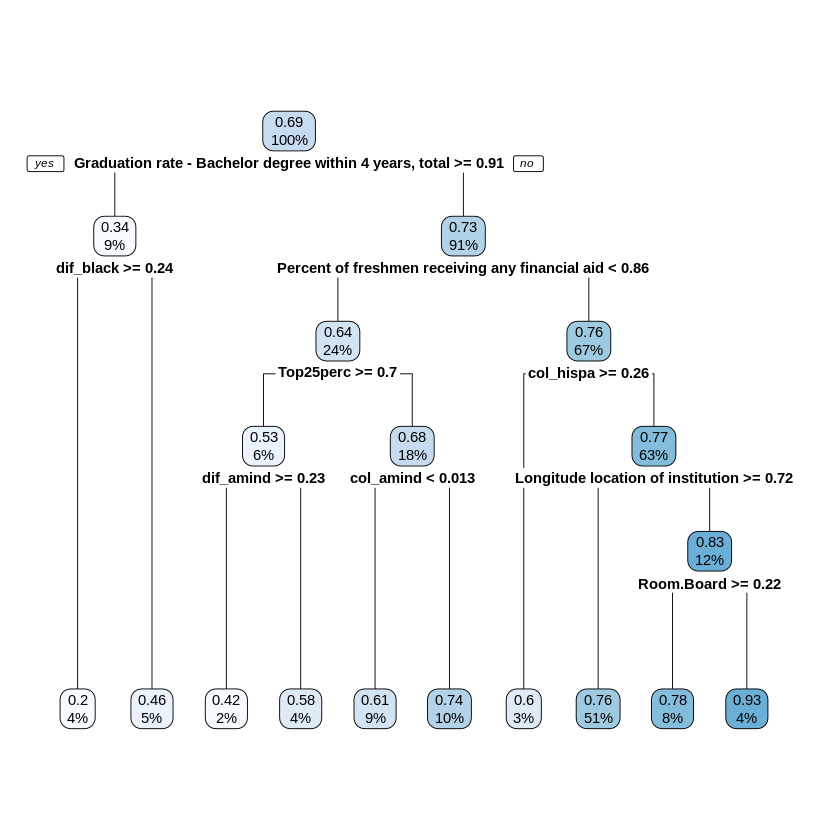

In [8]:
if (!requireNamespace("randomForest", quietly = TRUE)) {
  install.packages("randomForest")
}
if (!requireNamespace("caret", quietly = TRUE)) {
  install.packages("caret")
}
if (!requireNamespace("dplyr", quietly = TRUE)) {
  install.packages("dplyr")
}
if (!requireNamespace("rpart", quietly = TRUE)) {
  install.packages("rpart")
}
if (!requireNamespace("rpart.plot", quietly = TRUE)) {
  install.packages("rpart.plot")
}

library(randomForest)
library(caret)
library(dplyr)
library(rpart)
library(rpart.plot)

normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

selected_data_normalized <- selected_data %>%
  mutate(across(where(is.numeric), normalize))

set.seed(123)
train_indices <- createDataPartition(selected_data_normalized$AcceptanceRate, p = 0.8, list = FALSE)
train_data <- selected_data_normalized[train_indices, ]
test_data <- selected_data_normalized[-train_indices, ]

x_train <- train_data %>% select(-AcceptanceRate)
y_train <- train_data$AcceptanceRate
x_test <- test_data %>% select(-AcceptanceRate)
y_test <- test_data$AcceptanceRate

set.seed(123)
rf_model <- randomForest(x = x_train, y = y_train, ntree = 100)

print(rf_model)

predictions <- predict(rf_model, newdata = x_test)

mse <- mean((y_test - predictions)^2)
mae <- mean(abs(y_test - predictions))

cat('Mean Squared Error:', mse, '\n')
cat('Mean Absolute Error:', mae, '\n')

results <- data.frame(Predicted = predictions, Actual = y_test)
library(ggplot2)
ggplot(results, aes(x = Actual, y = Predicted)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = 'red') +
  labs(title = 'Predicted vs Actual Acceptance Rates',
       x = 'Actual Acceptance Rate',
       y = 'Predicted Acceptance Rate') +
  theme_minimal()

single_tree <- getTree(rf_model, k = 1, labelVar = TRUE)

tree_model <- rpart(AcceptanceRate ~ ., data = train_data, method = "anova",
                    control = rpart.control(cp = 0.01))

rpart.plot(tree_model)


Loading required package: GGally

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘GGally’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘ggstats’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Basic Information:
'data.frame':	488 obs. of  59 variables:
 $ UniversityName                                                : chr  "Abilene Christian University" "Adelphi University" "Adrian College" "Alaska Pacific University" ...
 $ Apps                                                          : int  1660 2186 1428 193 1899 1038 1732 2652 1267 1420 ...
 $ Top10perc                                                     : int  23 16 22 16 37 30 37 44 44 9 ...
 $ Top25perc                                                     : int  52 29 50 44 68 63 75 77 73 22 ...
 $ F.Undergrad                                                   : int  2885 2683 1036 249 1594 973 1830 1707 1306 1018 ...
 $ P.Undergrad                                                   : int  537 1227 99 869 32 306 110 44 28 287 ...
 $ Outstate                                                      : int  7440 12280 11250 7560 13868 15595 16548 17080 12572 8700 ...
 $ Room.Board                                                

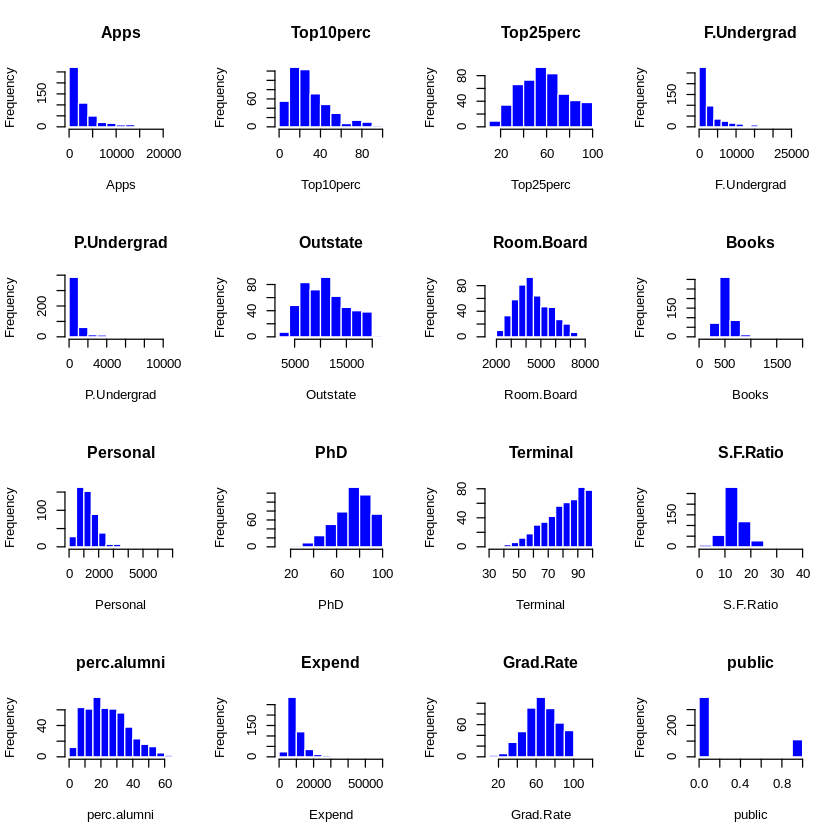

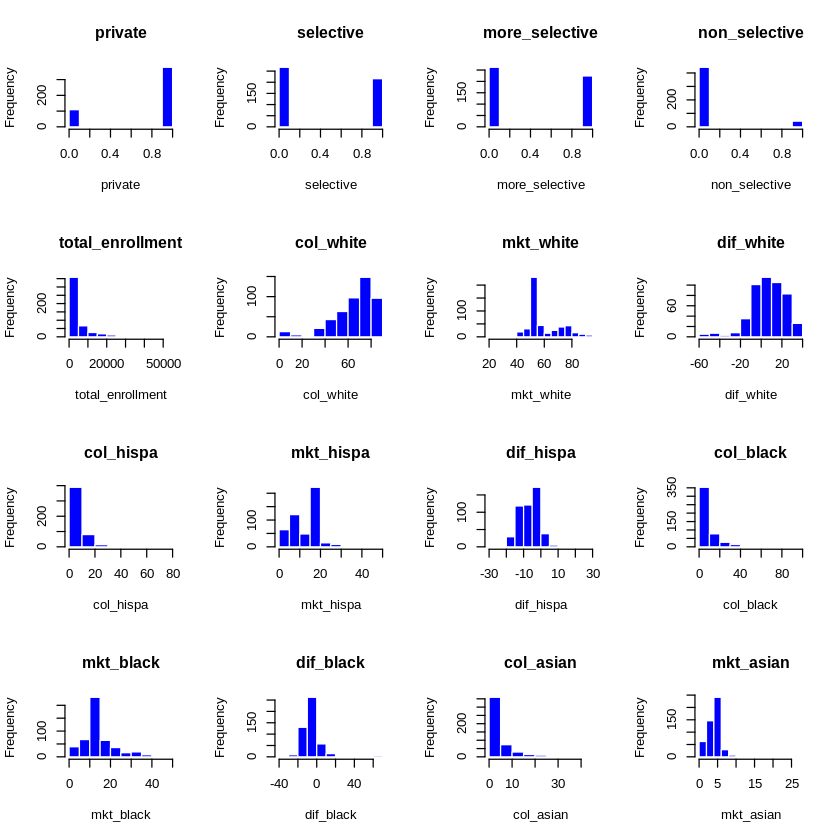

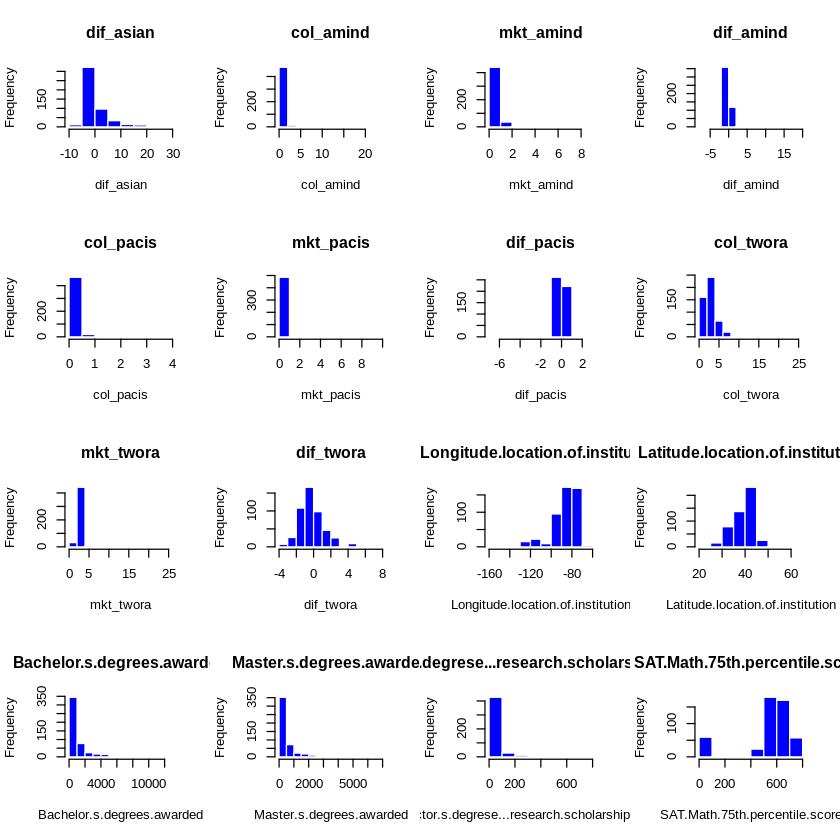

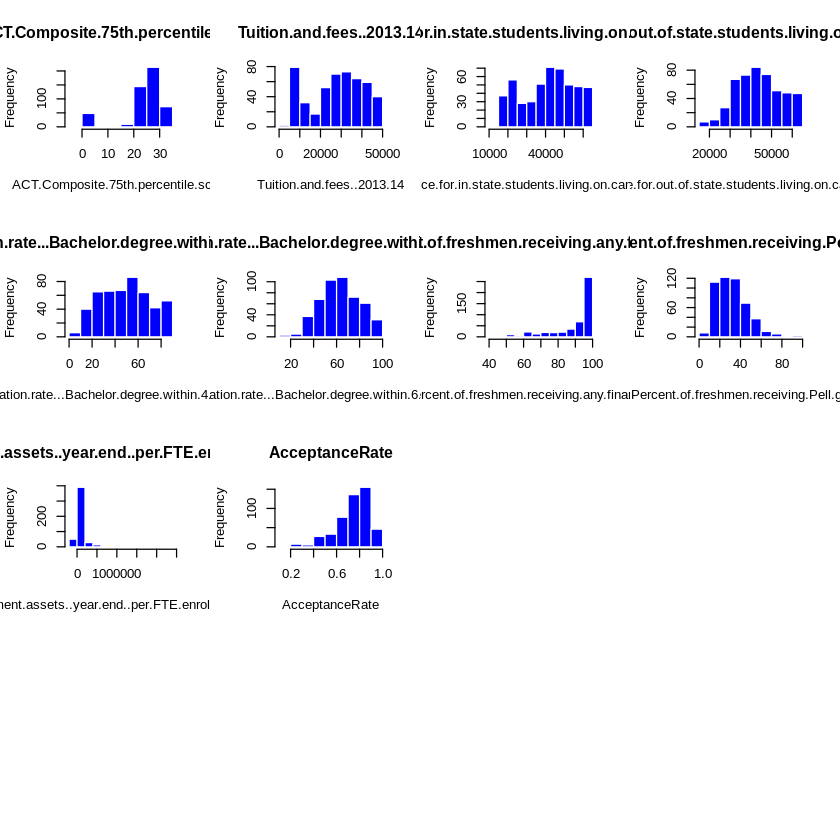

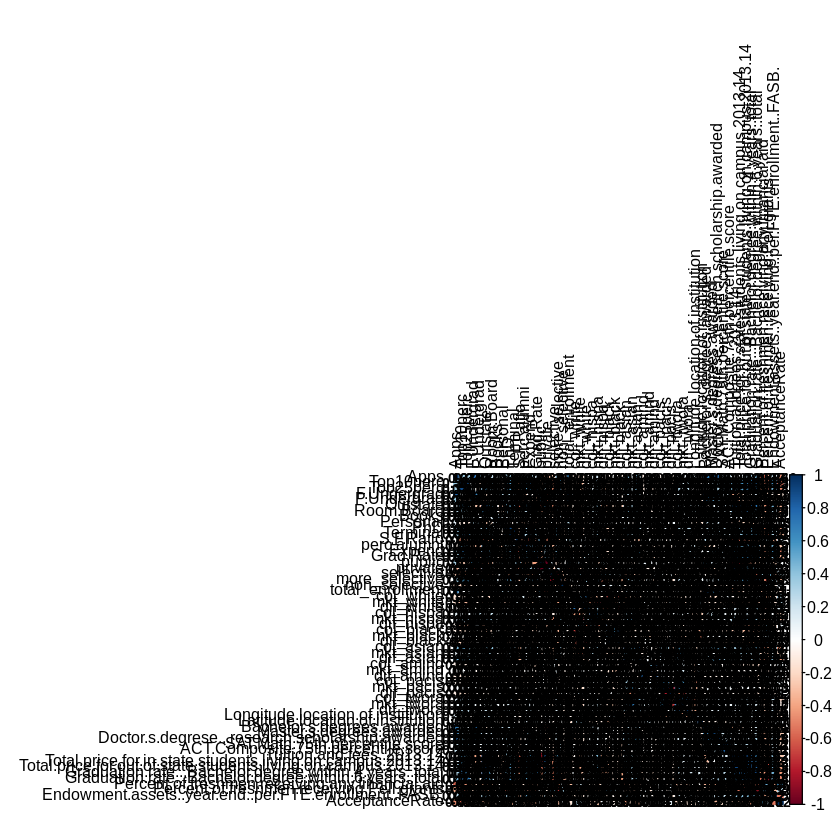

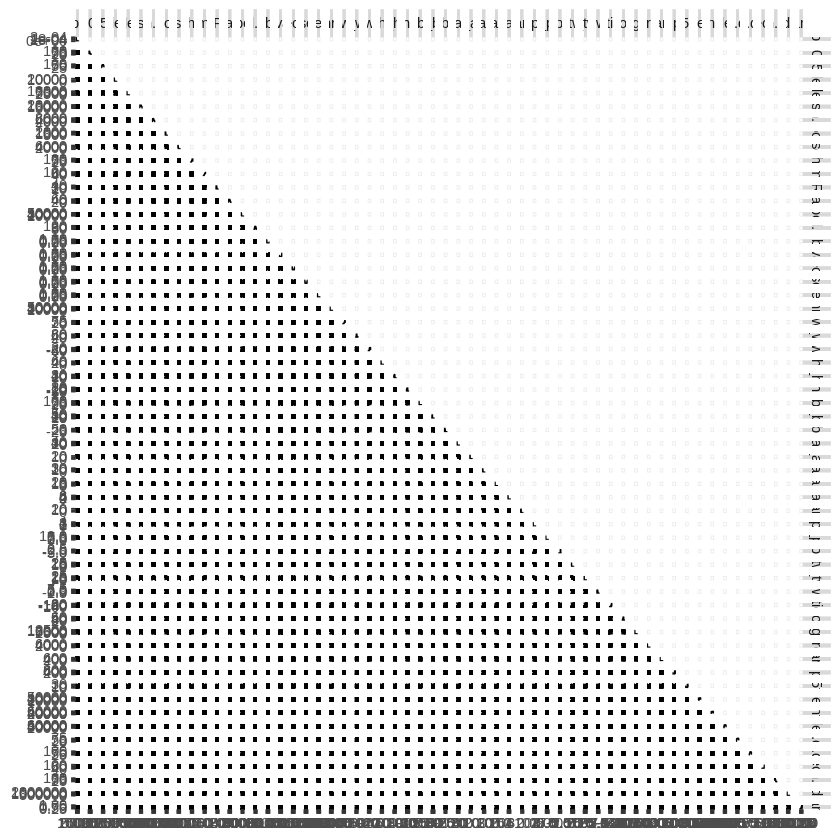

In [23]:
# Load necessary libraries
if (!require(GGally))install.packages("GGally")
library(ggplot2)
library(dplyr)
library(tidyr)
library(corrplot)
library(GGally)

# Load the dataset
file_path <- "non_standardized_combined_dataset.csv"
df <- read.csv(file_path)

# Display basic information about the dataset
cat("Basic Information:\n")
print(str(df))

# Display first few rows of the dataset
cat("\nFirst few rows of the dataset:\n")
print(head(df))

# Check for missing values
cat("\nMissing values in each column:\n")
print(colSums(is.na(df)))

# Summary statistics of numerical columns
cat("\nSummary statistics of numerical columns:\n")
print(summary(df))

# Distribution of numerical features
numeric_columns <- df %>% select(where(is.numeric))

par(mfrow = c(4, 4))
for (col in names(numeric_columns)) {
  hist(numeric_columns[[col]], main = col, xlab = col, col = "blue", border = "white")
}
par(mfrow = c(1, 1))

# Correlation matrix
cor_matrix <- cor(numeric_columns, use = "complete.obs")
corrplot(cor_matrix, method = "color", tl.col = "black", tl.cex = 0.8, addCoef.col = "black", number.cex = 0.7)

# Pair plot for numerical features
ggpairs(numeric_columns)

# Visualize categorical features (if any)
categorical_columns <- df %>% select(where(is.factor))

par(mfrow = c(3, 3))
for (col in names(categorical_columns)) {
  barplot(table(categorical_columns[[col]]), main = col, col = "blue", border = "white")
}
par(mfrow = c(1, 1))


Basic Information:
'data.frame':	488 obs. of  59 variables:
 $ UniversityName                                                : chr  "Abilene Christian University" "Adelphi University" "Adrian College" "Alaska Pacific University" ...
 $ Apps                                                          : num  0.07534 0.10159 0.06377 0.00215 0.08727 ...
 $ Top10perc                                                     : num  0.215 0.14 0.204 0.14 0.366 ...
 $ Top25perc                                                     : num  0.407 0.123 0.383 0.309 0.605 ...
 $ F.Undergrad                                                   : num  0.18183 0.16816 0.05666 0.00338 0.09444 ...
 $ P.Undergrad                                                   : num  0.05245 0.11996 0.00959 0.08493 0.00303 ...
 $ Outstate                                                      : num  0.195 0.503 0.437 0.203 0.604 ...
 $ Room.Board                                                    : num  0.162 0.709 0.24 0.304 0.427 ..

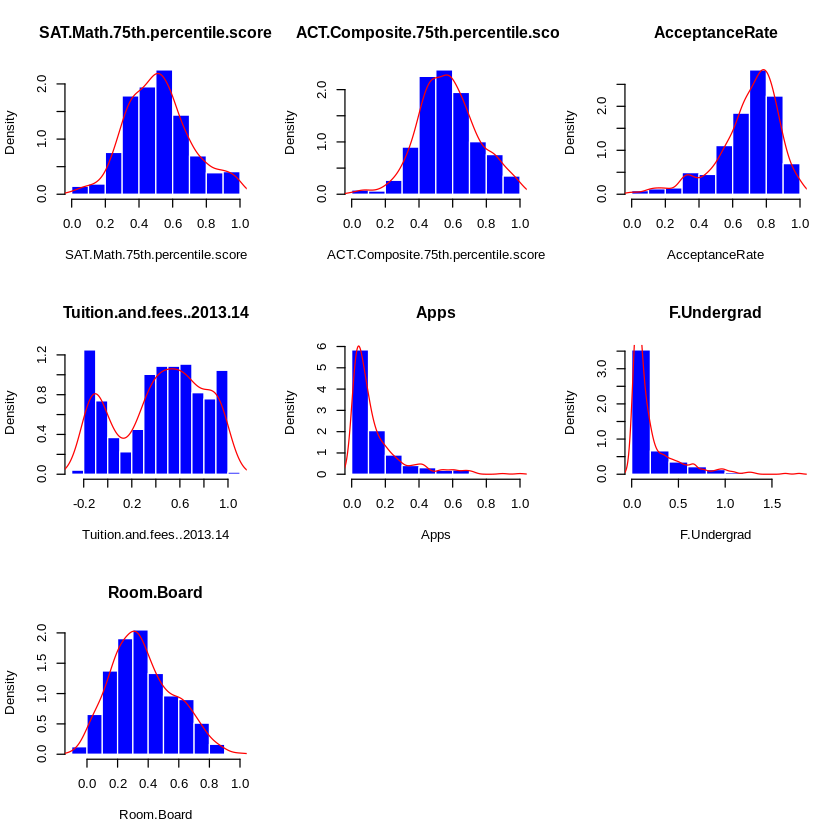

`geom_smooth()` using formula = 'y ~ x'


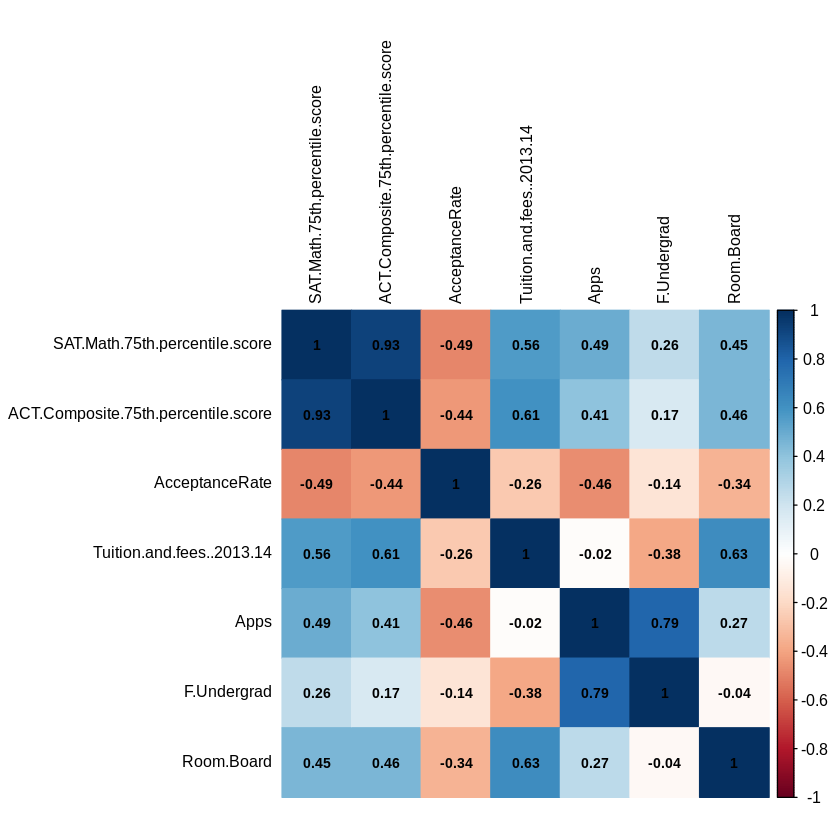

`geom_smooth()` using formula = 'y ~ x'


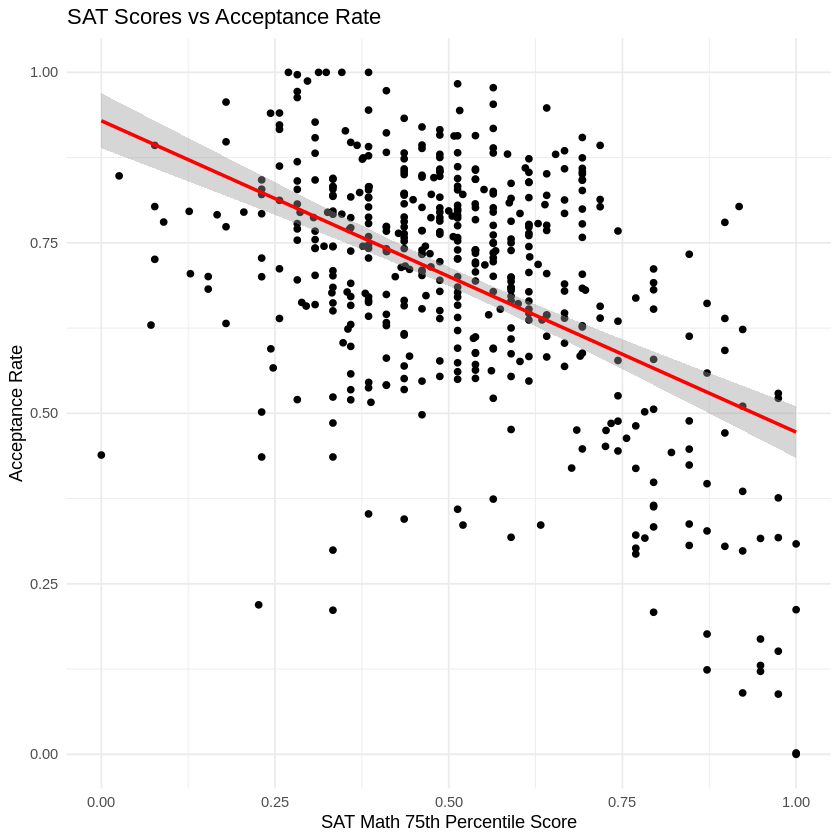

`geom_smooth()` using formula = 'y ~ x'


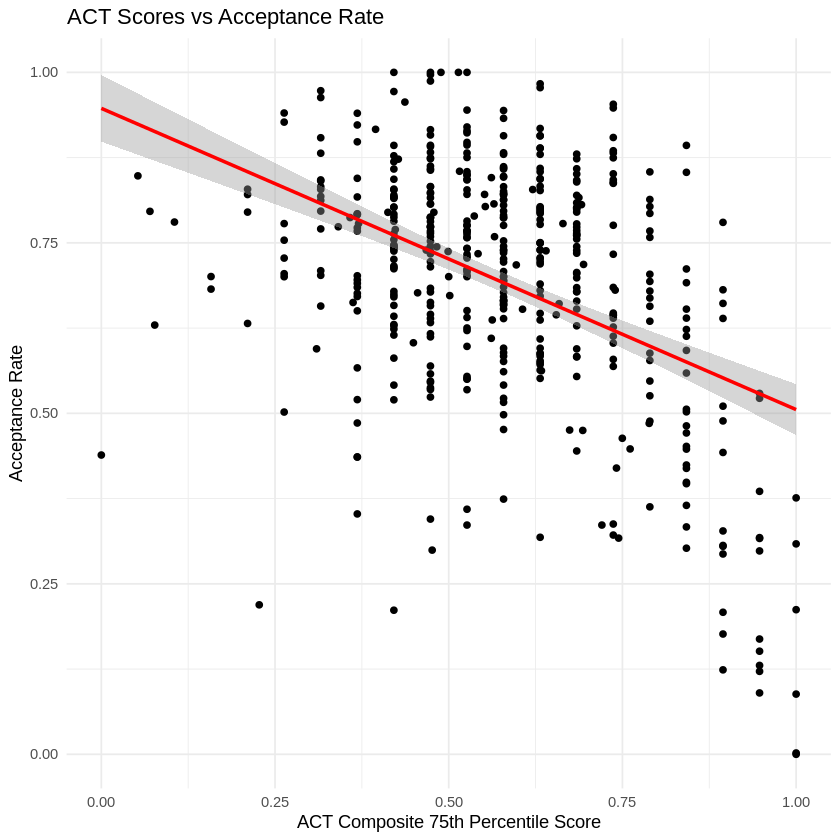

Warning message in predict.lm(model, interval = "prediction", level = 0.95):
“predictions on current data refer to _future_ responses
”


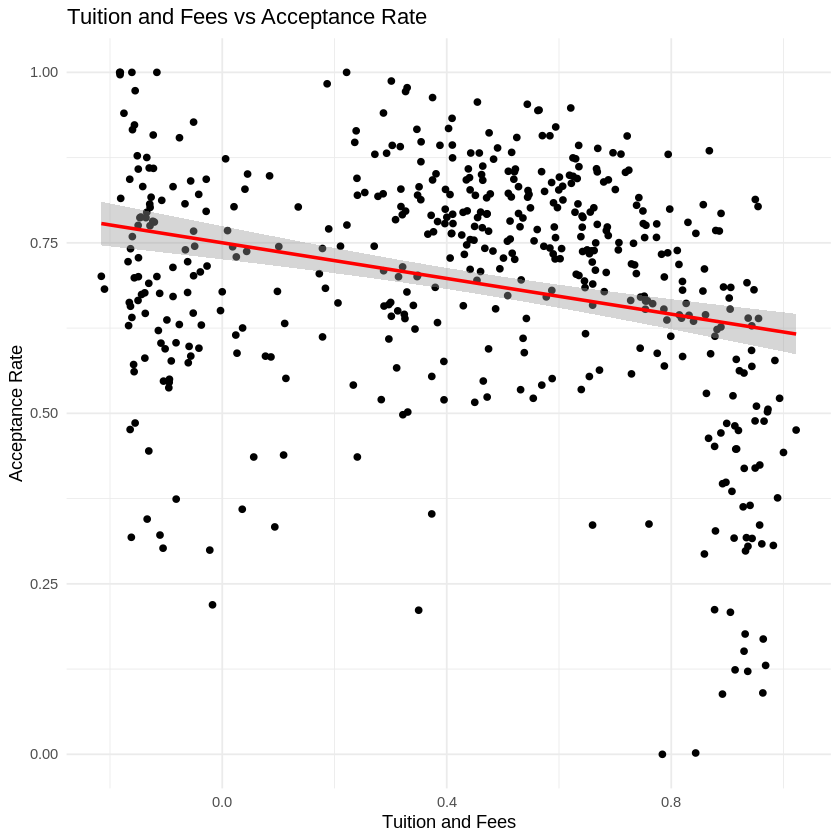

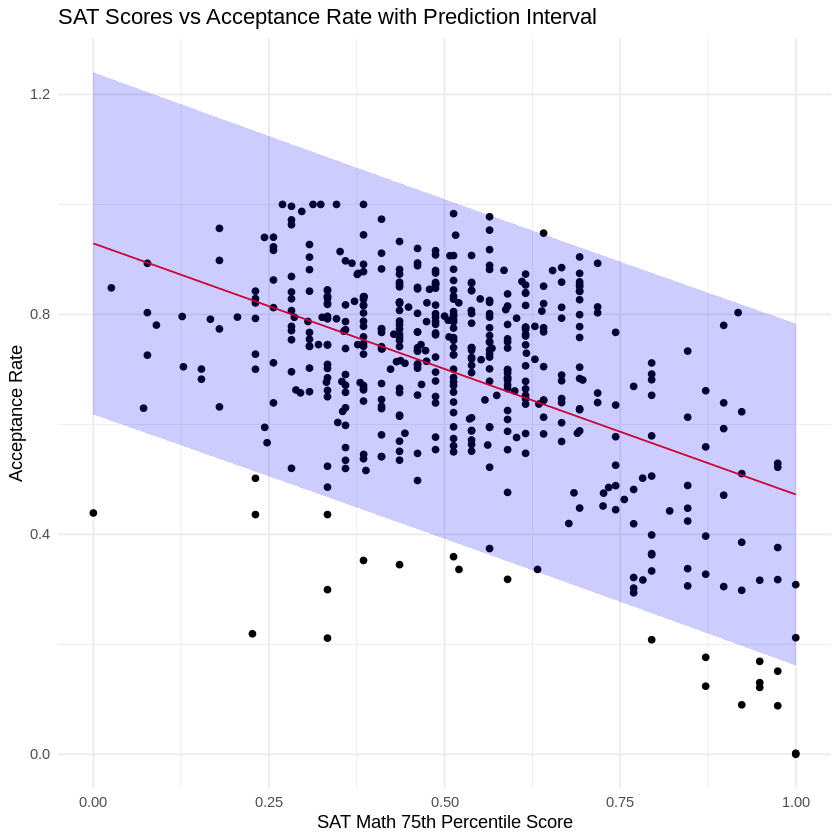

In [24]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(corrplot)
library(GGally)

# Load the dataset
file_path <- "combined_dataset.csv"
df <- read.csv(file_path)

# Display basic information about the dataset
cat("Basic Information:\n")
print(str(df))

# Display first few rows of the dataset
cat("\nFirst few rows of the dataset:\n")
print(head(df))

# Check for missing values
cat("\nMissing values in each column:\n")
print(colSums(is.na(df)))

# Summary statistics of numerical columns
cat("\nSummary statistics of numerical columns:\n")
print(summary(df))

# Select relevant columns for analysis
columns_of_interest <- c('SAT.Math.75th.percentile.score',
                         'ACT.Composite.75th.percentile.score',
                         'AcceptanceRate',
                         'Tuition.and.fees..2013.14',
                         'Apps',
                         'F.Undergrad',
                         'Room.Board')
df_selected <- df %>% select(all_of(columns_of_interest)) %>% drop_na()

# Visualize the distribution of selected numerical features
par(mfrow = c(3, 3))
for (col in columns_of_interest) {
  hist(df_selected[[col]], main = col, xlab = col, col = "blue", border = "white", probability = TRUE)
  lines(density(df_selected[[col]]), col = "red")
}
par(mfrow = c(1, 1))

# Correlation matrix
cor_matrix <- cor(df_selected, use = "complete.obs")
corrplot(cor_matrix, method = "color", tl.col = "black", tl.cex = 0.8, addCoef.col = "black", number.cex = 0.7)

# Scatter plot and regression line for SAT vs Acceptance Rate
ggplot(df_selected, aes(x = SAT.Math.75th.percentile.score, y = AcceptanceRate)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "SAT Scores vs Acceptance Rate", x = "SAT Math 75th Percentile Score", y = "Acceptance Rate") +
  theme_minimal()

# Scatter plot and regression line for ACT vs Acceptance Rate
ggplot(df_selected, aes(x = ACT.Composite.75th.percentile.score, y = AcceptanceRate)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "ACT Scores vs Acceptance Rate", x = "ACT Composite 75th Percentile Score", y = "Acceptance Rate") +
  theme_minimal()

# Scatter plot and regression line for Tuition and fees vs Acceptance Rate
ggplot(df_selected, aes(x = Tuition.and.fees..2013.14, y = AcceptanceRate)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Tuition and Fees vs Acceptance Rate", x = "Tuition and Fees", y = "Acceptance Rate") +
  theme_minimal()

# Linear regression model for SAT vs Acceptance Rate with prediction intervals
model <- lm(AcceptanceRate ~ SAT.Math.75th.percentile.score, data = df_selected)
pred <- predict(model, interval = "prediction", level = 0.95)
df_selected <- cbind(df_selected, pred)

# Plot with prediction intervals for SAT vs Acceptance Rate
ggplot(df_selected, aes(x = SAT.Math.75th.percentile.score, y = AcceptanceRate)) +
  geom_point() +
  geom_line(aes(y = fit), color = "red") +
  geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = 0.2, fill = "blue") +
  labs(title = "SAT Scores vs Acceptance Rate with Prediction Interval", x = "SAT Math 75th Percentile Score", y = "Acceptance Rate") +
  theme_minimal()


Basic Information:
'data.frame':	488 obs. of  59 variables:
 $ UniversityName                                                : chr  "Abilene Christian University" "Adelphi University" "Adrian College" "Alaska Pacific University" ...
 $ Apps                                                          : num  0.07534 0.10159 0.06377 0.00215 0.08727 ...
 $ Top10perc                                                     : num  0.215 0.14 0.204 0.14 0.366 ...
 $ Top25perc                                                     : num  0.407 0.123 0.383 0.309 0.605 ...
 $ F.Undergrad                                                   : num  0.18183 0.16816 0.05666 0.00338 0.09444 ...
 $ P.Undergrad                                                   : num  0.05245 0.11996 0.00959 0.08493 0.00303 ...
 $ Outstate                                                      : num  0.195 0.503 0.437 0.203 0.604 ...
 $ Room.Board                                                    : num  0.162 0.709 0.24 0.304 0.427 ..

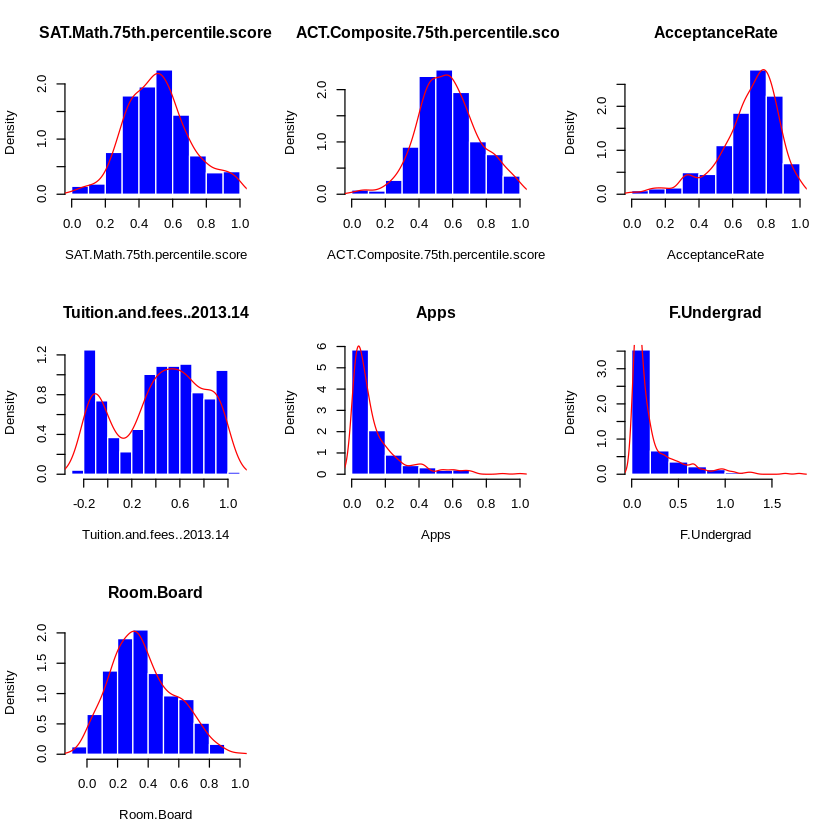

`geom_smooth()` using formula = 'y ~ x'


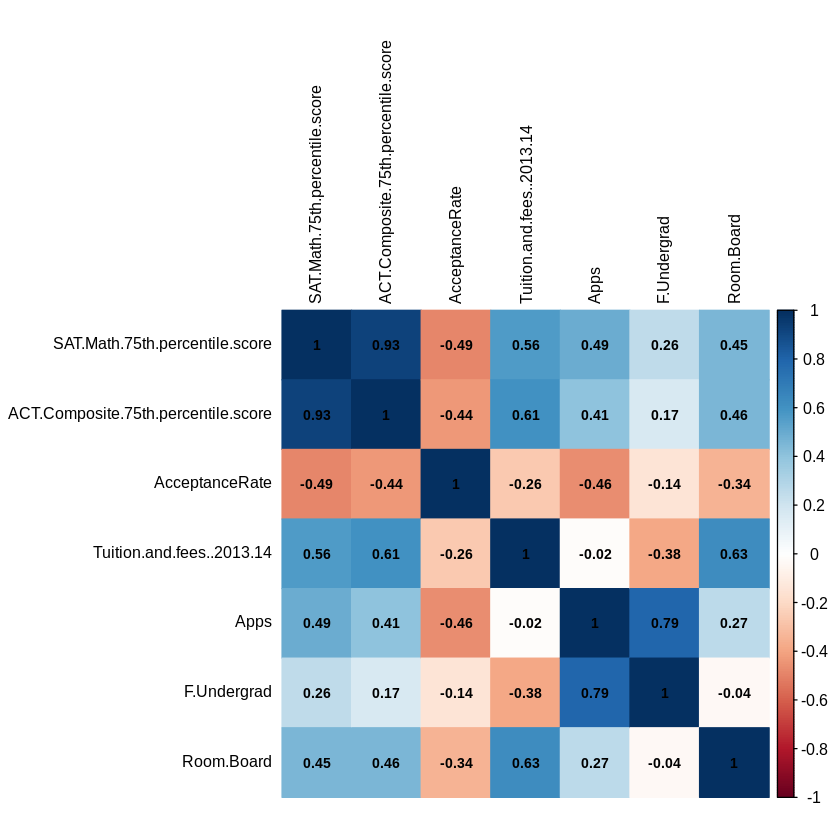

`geom_smooth()` using formula = 'y ~ x'


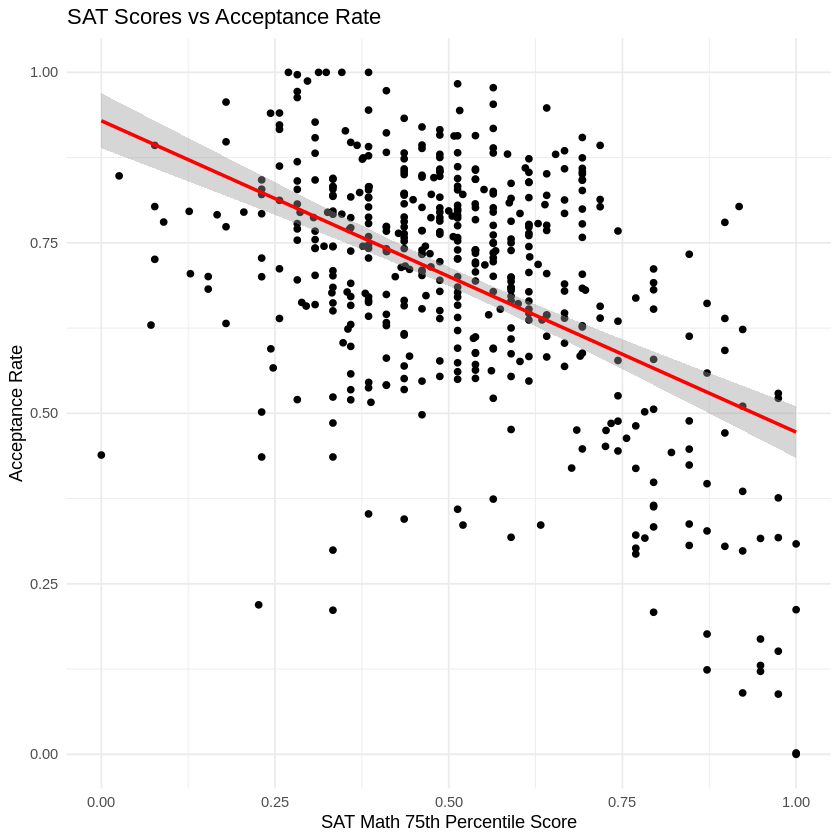

`geom_smooth()` using formula = 'y ~ x'


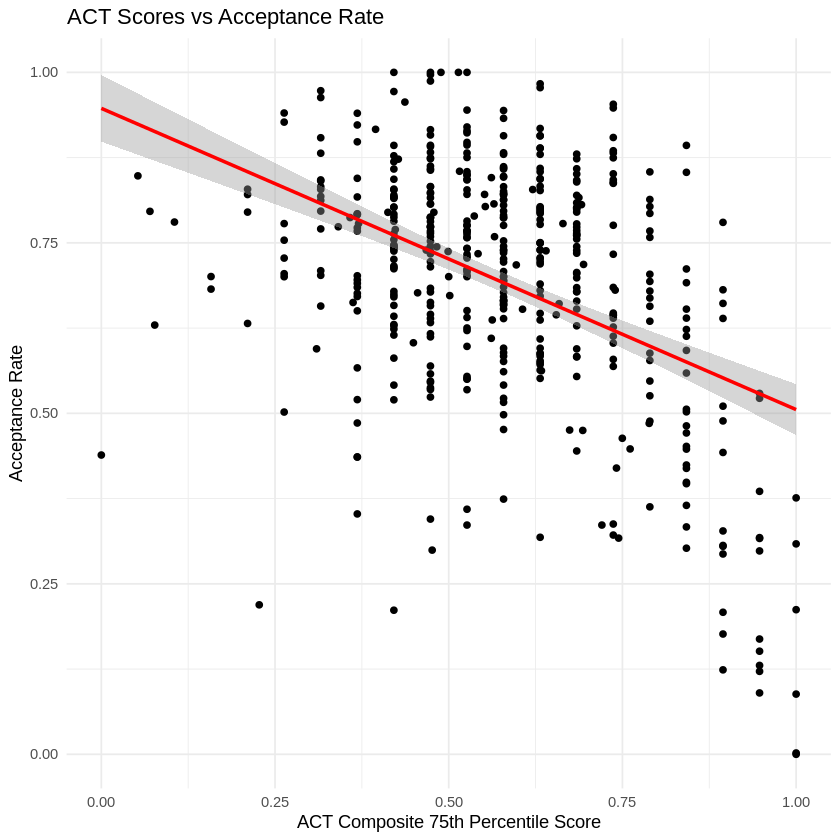

Warning message in predict.lm(model, interval = "prediction", level = 0.95):
“predictions on current data refer to _future_ responses
”


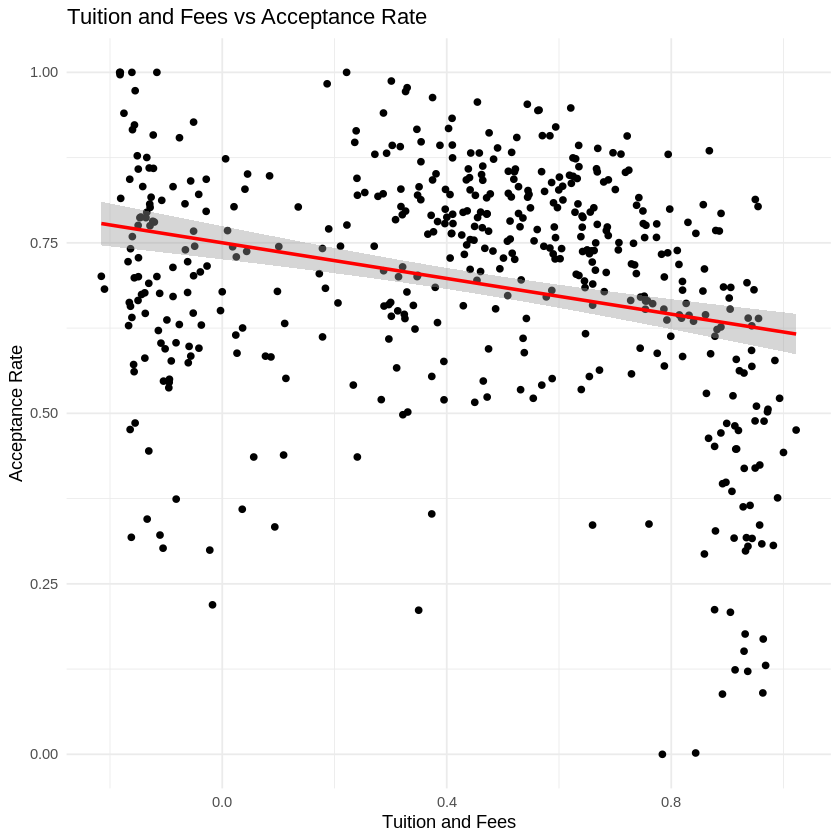

`geom_smooth()` using formula = 'y ~ x'


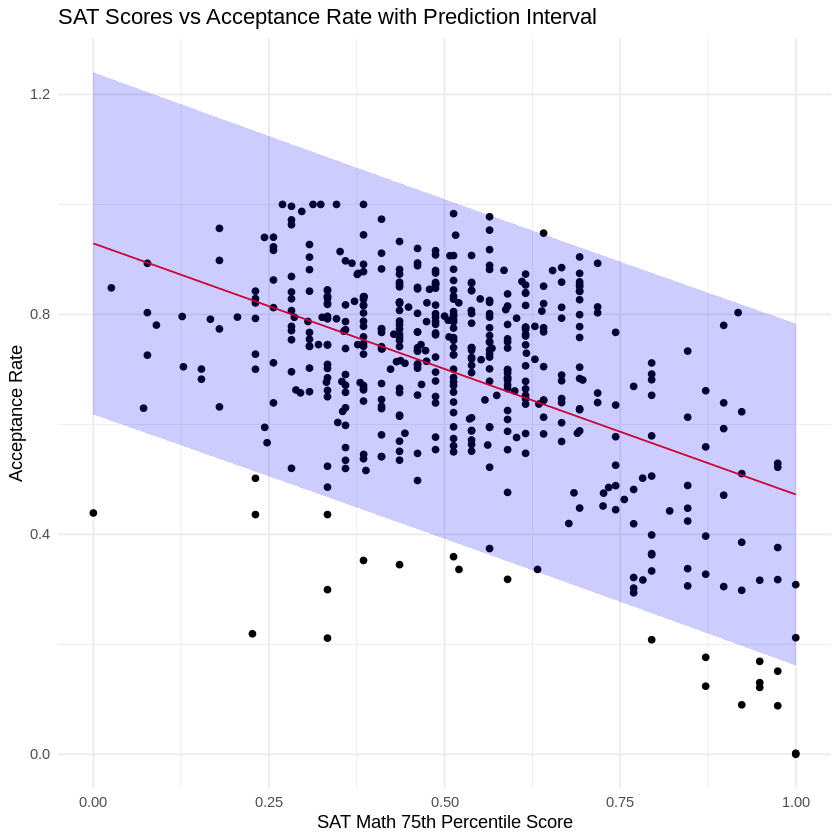

`geom_smooth()` using formula = 'y ~ x'


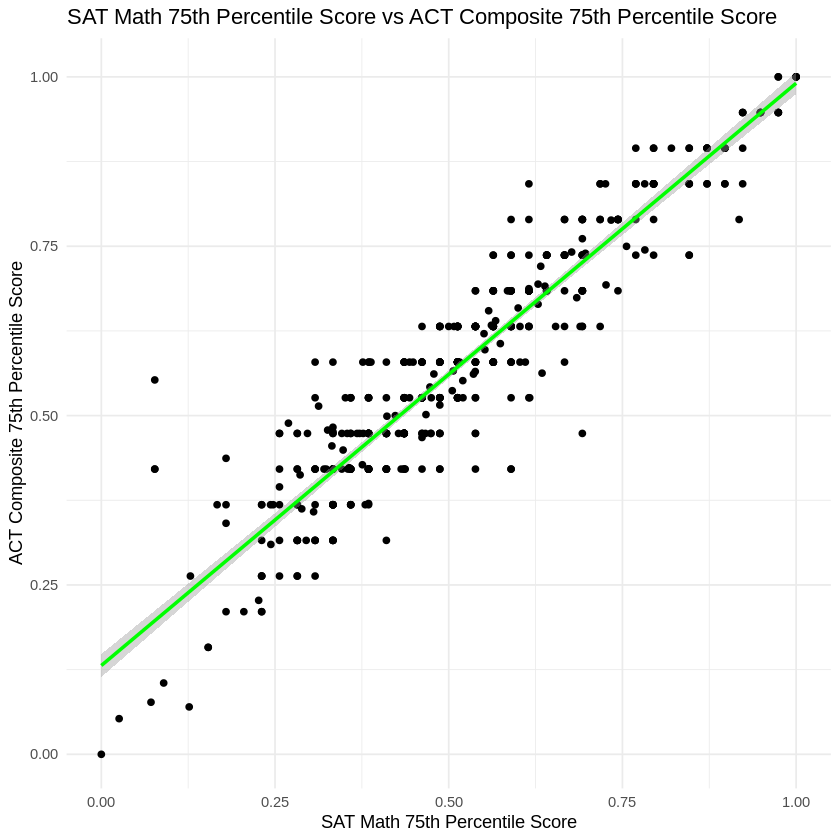

`geom_smooth()` using formula = 'y ~ x'


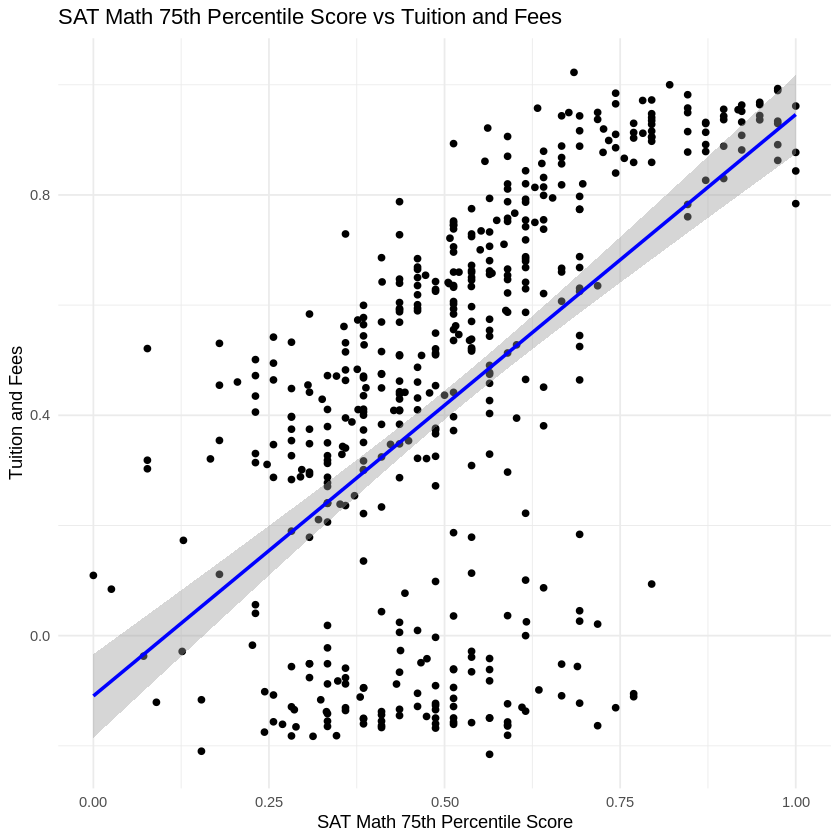

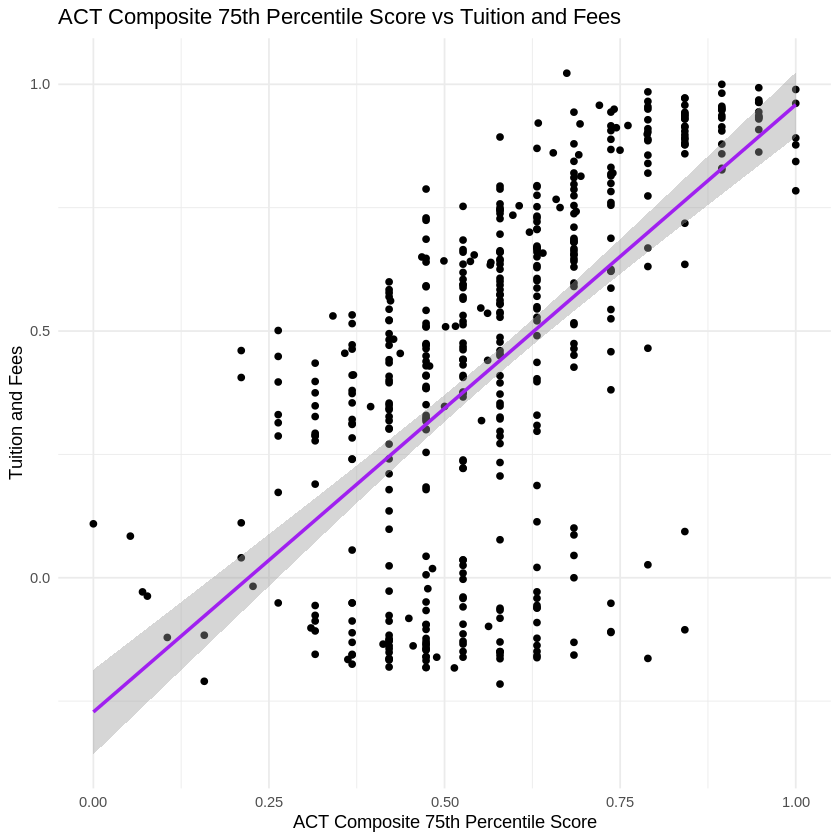

In [25]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(corrplot)
library(GGally)

# Load the dataset
file_path <- "combined_dataset.csv"
df <- read.csv(file_path)

# Display basic information about the dataset
cat("Basic Information:\n")
print(str(df))

# Display first few rows of the dataset
cat("\nFirst few rows of the dataset:\n")
print(head(df))

# Check for missing values
cat("\nMissing values in each column:\n")
print(colSums(is.na(df)))

# Summary statistics of numerical columns
cat("\nSummary statistics of numerical columns:\n")
print(summary(df))

# Select relevant columns for analysis
columns_of_interest <- c('SAT.Math.75th.percentile.score',
                         'ACT.Composite.75th.percentile.score',
                         'AcceptanceRate',
                         'Tuition.and.fees..2013.14',
                         'Apps',
                         'F.Undergrad',
                         'Room.Board')
df_selected <- df %>% select(all_of(columns_of_interest)) %>% drop_na()

# Visualize the distribution of selected numerical features
par(mfrow = c(3, 3))
for (col in columns_of_interest) {
  hist(df_selected[[col]], main = col, xlab = col, col = "blue", border = "white", probability = TRUE)
  lines(density(df_selected[[col]]), col = "red")
}
par(mfrow = c(1, 1))

# Correlation matrix
cor_matrix <- cor(df_selected, use = "complete.obs")
corrplot(cor_matrix, method = "color", tl.col = "black", tl.cex = 0.8, addCoef.col = "black", number.cex = 0.7)

# Scatter plot and regression line for SAT vs Acceptance Rate
ggplot(df_selected, aes(x = SAT.Math.75th.percentile.score, y = AcceptanceRate)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "SAT Scores vs Acceptance Rate", x = "SAT Math 75th Percentile Score", y = "Acceptance Rate") +
  theme_minimal()

# Scatter plot and regression line for ACT vs Acceptance Rate
ggplot(df_selected, aes(x = ACT.Composite.75th.percentile.score, y = AcceptanceRate)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "ACT Scores vs Acceptance Rate", x = "ACT Composite 75th Percentile Score", y = "Acceptance Rate") +
  theme_minimal()

# Scatter plot and regression line for Tuition and fees vs Acceptance Rate
ggplot(df_selected, aes(x = Tuition.and.fees..2013.14, y = AcceptanceRate)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Tuition and Fees vs Acceptance Rate", x = "Tuition and Fees", y = "Acceptance Rate") +
  theme_minimal()

# Linear regression model for SAT vs Acceptance Rate with prediction intervals
model <- lm(AcceptanceRate ~ SAT.Math.75th.percentile.score, data = df_selected)
pred <- predict(model, interval = "prediction", level = 0.95)
df_selected <- cbind(df_selected, pred)

# Plot with prediction intervals for SAT vs Acceptance Rate
ggplot(df_selected, aes(x = SAT.Math.75th.percentile.score, y = AcceptanceRate)) +
  geom_point() +
  geom_line(aes(y = fit), color = "red") +
  geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = 0.2, fill = "blue") +
  labs(title = "SAT Scores vs Acceptance Rate with Prediction Interval", x = "SAT Math 75th Percentile Score", y = "Acceptance Rate") +
  theme_minimal()

# Scatter plot and regression line for SAT vs ACT
ggplot(df_selected, aes(x = SAT.Math.75th.percentile.score, y = ACT.Composite.75th.percentile.score)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "green") +
  labs(title = "SAT Math 75th Percentile Score vs ACT Composite 75th Percentile Score", x = "SAT Math 75th Percentile Score", y = "ACT Composite 75th Percentile Score") +
  theme_minimal()

# Scatter plot and regression line for SAT vs Tuition and Fees
ggplot(df_selected, aes(x = SAT.Math.75th.percentile.score, y = Tuition.and.fees..2013.14)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(title = "SAT Math 75th Percentile Score vs Tuition and Fees", x = "SAT Math 75th Percentile Score", y = "Tuition and Fees") +
  theme_minimal()

# Scatter plot and regression line for ACT vs Tuition and Fees
ggplot(df_selected, aes(x = ACT.Composite.75th.percentile.score, y = Tuition.and.fees..2013.14)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "purple") +
  labs(title = "ACT Composite 75th Percentile Score vs Tuition and Fees", x = "ACT Composite 75th Percentile Score", y = "Tuition and Fees") +
  theme_minimal()
